In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb

file_path = "/kaggle/input/final-solar-data/augmented_df_v_final.csv"
df = pd.read_csv(file_path)
print(df)



     Day   Time  Solar irradiance(W/m2)  Inner glass temperature  \
0    1.0   9.00                  660.00                   308.15   
1    1.0   9.25                  684.22                   309.65   
2    1.0   9.50                  685.55                   311.60   
3    1.0   9.75                  809.85                   315.09   
4    1.0  10.00                  812.00                   315.15   
..   ...    ...                     ...                      ...   
143  4.0  17.00                  181.00                   316.15   
144  4.0  17.25                  164.64                   315.75   
145  4.0  17.50                  117.79                   313.94   
146  4.0  17.75                   94.39                   313.71   
147  4.0  18.00                    2.00                   312.95   

     Outer glass temperature  Basin water temperature  \
0                     306.15                   316.15   
1                     308.93                   316.19   
2           

In [2]:
df.columns

Index(['Day', 'Time', 'Solar irradiance(W/m2)', 'Inner glass temperature',
       'Outer glass temperature', 'Basin water temperature',
       'Fresh water production (ml)', 'Ti', 'Area (m2)', 'Ambient temperature',
       'Accumulated output (ml)', 'Mw (L)', 'mw(L/m2)', 'h_fg',
       'Thermal energy efficiency', 'Ex_out', 'Ex_in', 'Exergy_efficiency'],
      dtype='object')

In [3]:
df.describe(include='all').transpose()


,count,mean,std,min,25%,50%,75%,max
Day,148.0,2.500000e+00,1.121830,1.000000e+00,1.750000e+00,2.500000e+00,3.250000e+00,4.000000e+00
Time,148.0,1.350000e+01,2.678333,9.000000e+00,1.125000e+01,1.350000e+01,1.575000e+01,1.800000e+01
Solar irradiance(W/m2),148.0,6.406095e+02,264.863627,2.000000e+00,5.062500e+02,7.006750e+02,8.577775e+02,9.450000e+02
Inner glass temperature,148.0,3.185582e+02,6.348767,3.011500e+02,3.140225e+02,3.194050e+02,3.241425e+02,3.289500e+02
Outer glass temperature,148.0,3.136653e+02,5.391518,2.971500e+02,3.101600e+02,3.138650e+02,3.171425e+02,3.251500e+02
Basin water temperature,148.0,3.281988e+02,8.362481,3.081500e+02,3.220875e+02,3.281500e+02,3.342200e+02,3.441500e+02
Fresh water production (ml),148.0,2.846257e+01,23.540913,8.000000e-02,6.007500e+00,2.431000e+01,4.675500e+01,7.900000e+01
Ti,148.0,3.233785e+02,7.131946,3.046500e+02,3.180138e+02,3.235350e+02,3.298925e+02,3.351500e+02
Area (m2),148.0,2.500000e-01,0.000000,2.500000e-01,2.500000e-01,2.500000e-01,2.500000e-01,2.500000e-01
Ambient temperature,148.0,3.128200e+02,5.216027,2.960500e+02,3.098914e+02,3.131430e+02,3.161278e+02,3.240500e+02


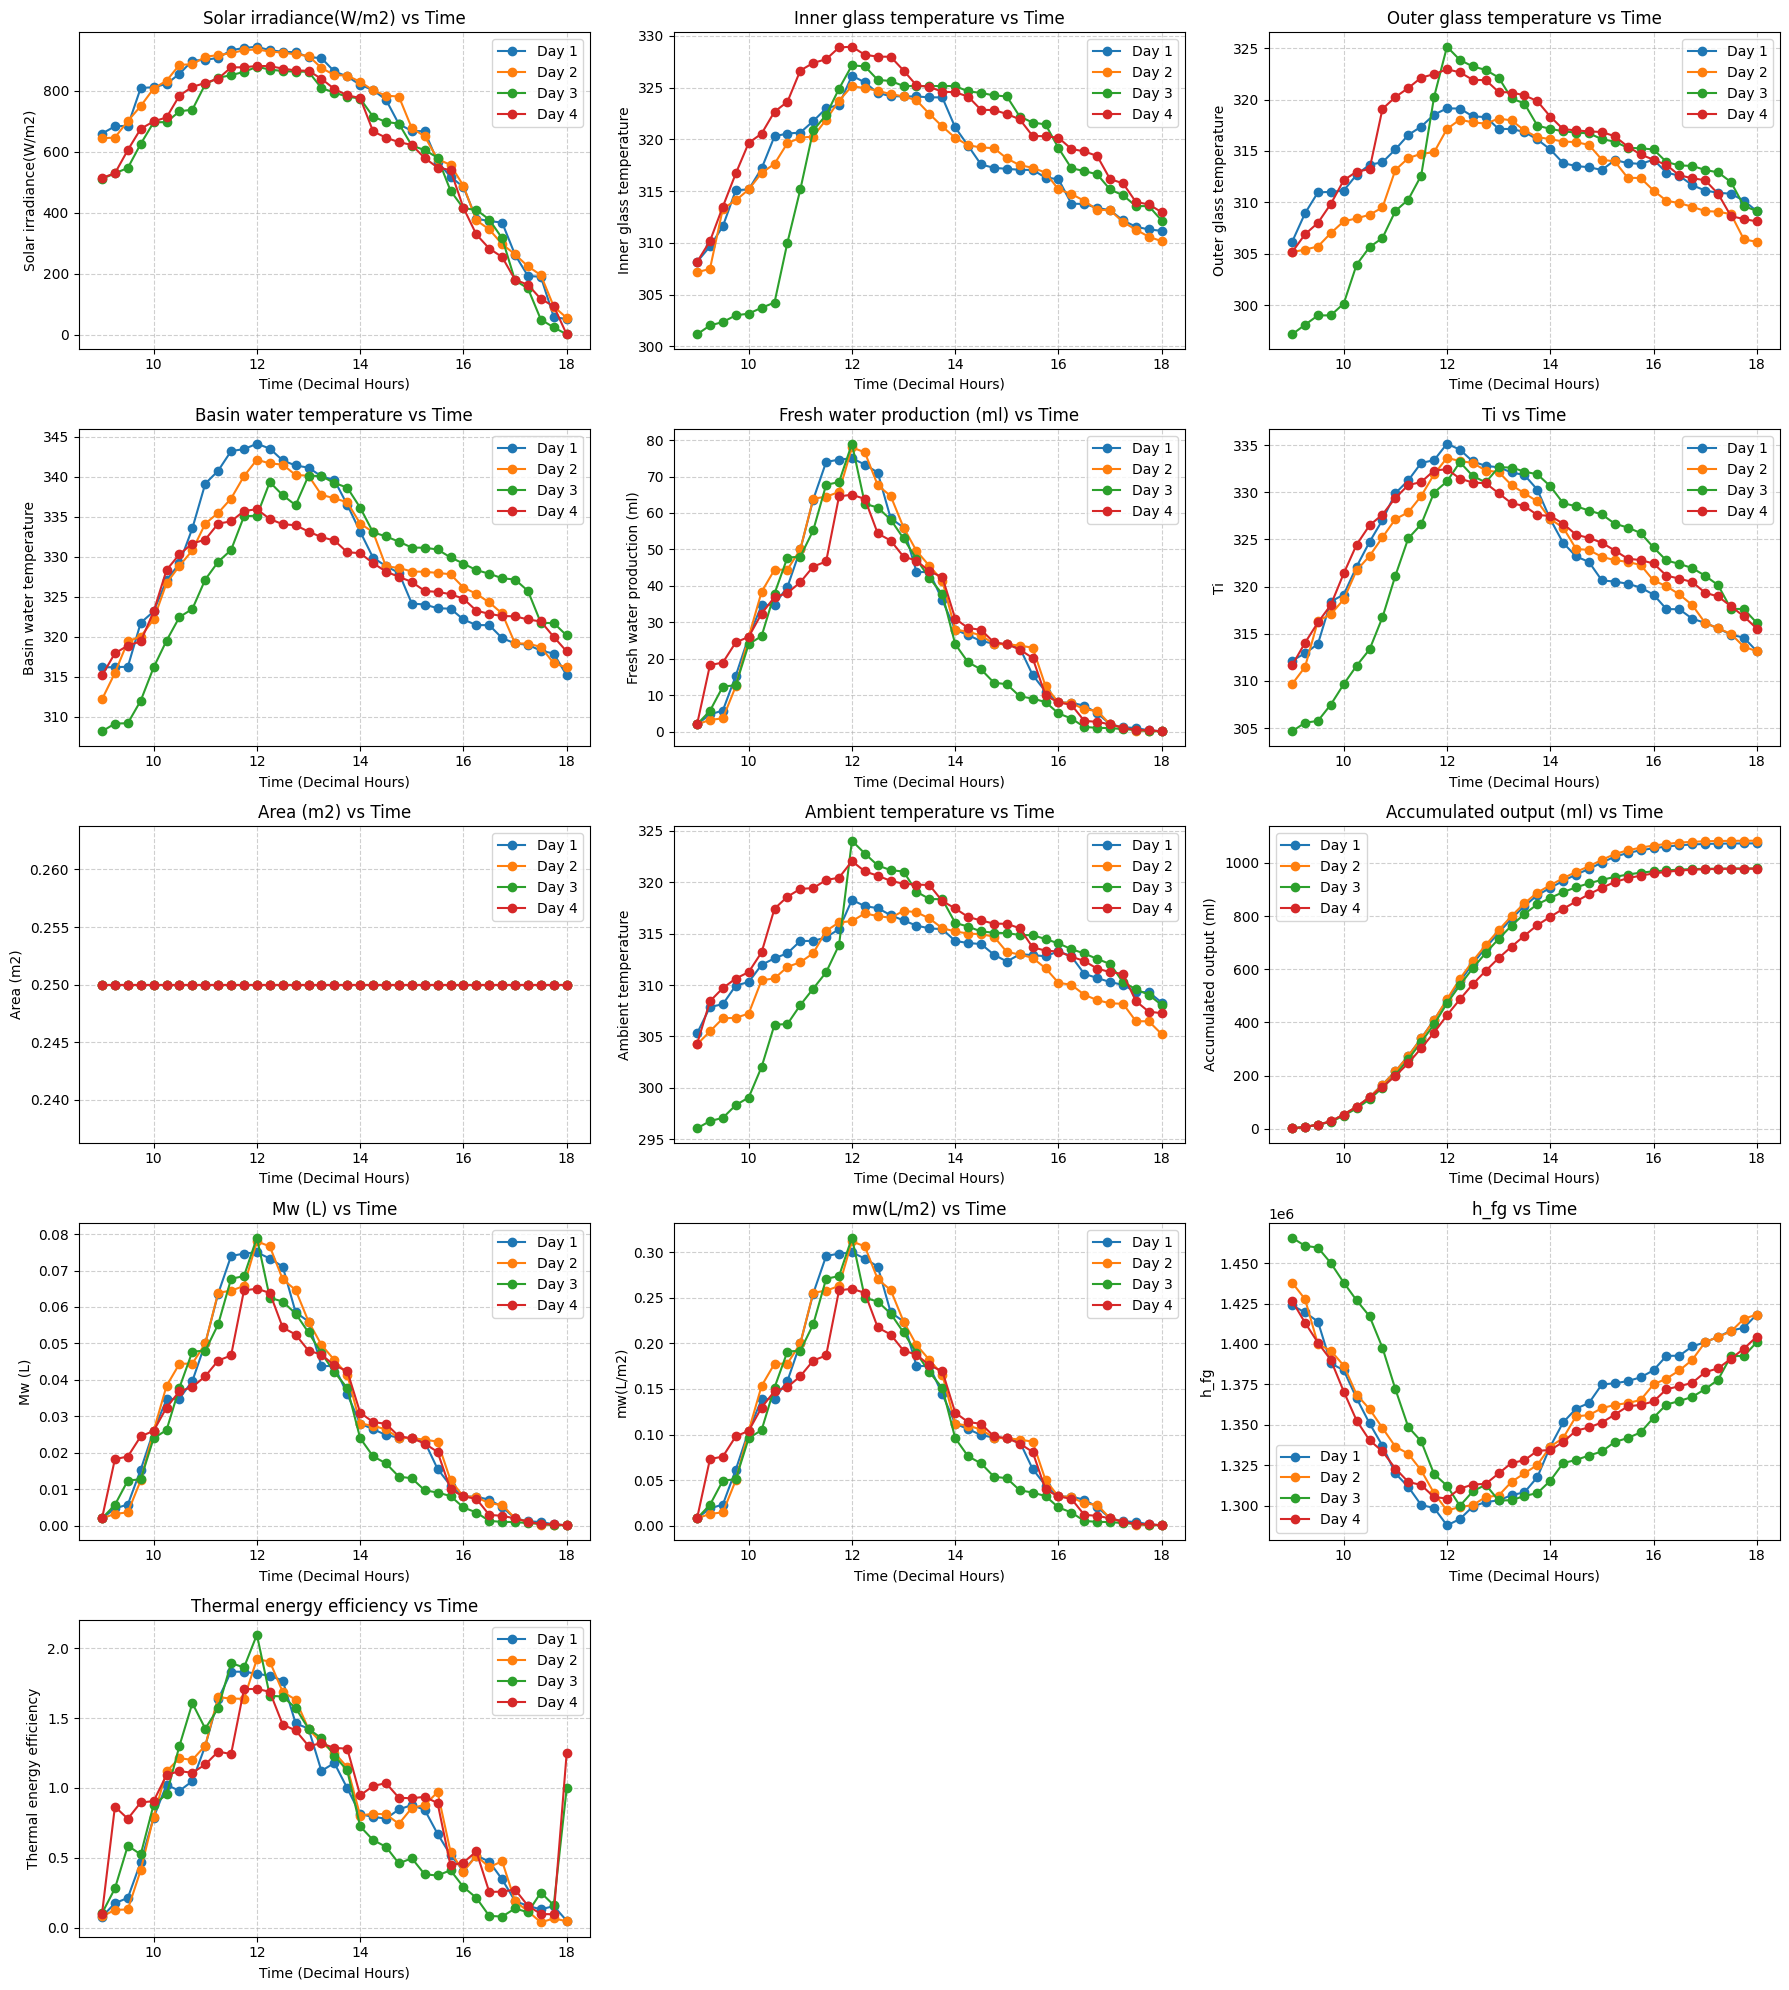

In [4]:
import matplotlib.pyplot as plt
import math

features = [
    'Solar irradiance(W/m2)', 'Inner glass temperature',
       'Outer glass temperature', 'Basin water temperature',
       'Fresh water production (ml)', 'Ti', 'Area (m2)', 'Ambient temperature',
       'Accumulated output (ml)', 'Mw (L)', 'mw(L/m2)', 'h_fg',
       'Thermal energy efficiency'
]

n = len(features)
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(18, rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(rows, cols, i)
    for day in sorted(df['Day'].unique()):
        day_data = df[df['Day'] == day]
        plt.plot(day_data['Time'], day_data[feature], marker='o', linestyle='-', label=f'Day {int(day)}')
    plt.xlabel('Time (Decimal Hours)')
    plt.ylabel(feature)
    plt.title(f'{feature} vs Time')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

plt.tight_layout()
plt.show()


In [5]:
day4_efficiency = df[df['Day'] == 4]['Thermal energy efficiency']
print(day4_efficiency)


111    0.098498
112    0.865178
113    0.778790
114    0.895702
115    0.905036
116    1.092728
117    1.119868
118    1.108088
119    1.167462
120    1.259824
121    1.242107
122    1.707010
123    1.709057
124    1.687953
125    1.453399
126    1.411725
127    1.300674
128    1.318448
129    1.286267
130    1.280918
131    0.946494
132    1.013593
133    1.034076
134    0.929111
135    0.925547
136    0.936087
137    0.891161
138    0.444576
139    0.465357
140    0.544649
141    0.255087
142    0.256673
143    0.271592
144    0.155522
145    0.096563
146    0.094728
147    1.248450
Name: Thermal energy efficiency, dtype: float64


In [5]:
last_day3 = df[df['Day'] == 3].iloc[-1]
last_day4 = df[df['Day'] == 4].iloc[-1]

print("Last row of Day 3:")
print(last_day3)

print("\nLast row of Day 4:")
print(last_day4)


Last row of Day 3:
Day                            3.000000e+00
Time                           1.800000e+01
Solar irradiance(W/m2)         2.000000e+00
Inner glass temperature        3.121500e+02
Outer glass temperature        3.091500e+02
Basin water temperature        3.201500e+02
Fresh water production (ml)    8.000000e-02
Ti                             3.161500e+02
Area (m2)                      2.500000e-01
Ambient temperature            3.080500e+02
Accumulated output (ml)        9.786800e+02
Mw (L)                         8.000000e-05
mw(L/m2)                       3.200000e-04
h_fg                           1.401064e+06
Thermal energy efficiency      9.963122e-01
Ex_out                         1.694493e+01
Ex_in                          4.657734e-01
Exergy_efficiency              3.638021e+01
Name: 110, dtype: float64

Last row of Day 4:
Day                            4.000000e+00
Time                           1.800000e+01
Solar irradiance(W/m2)         2.000000e+00
Inner glass

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


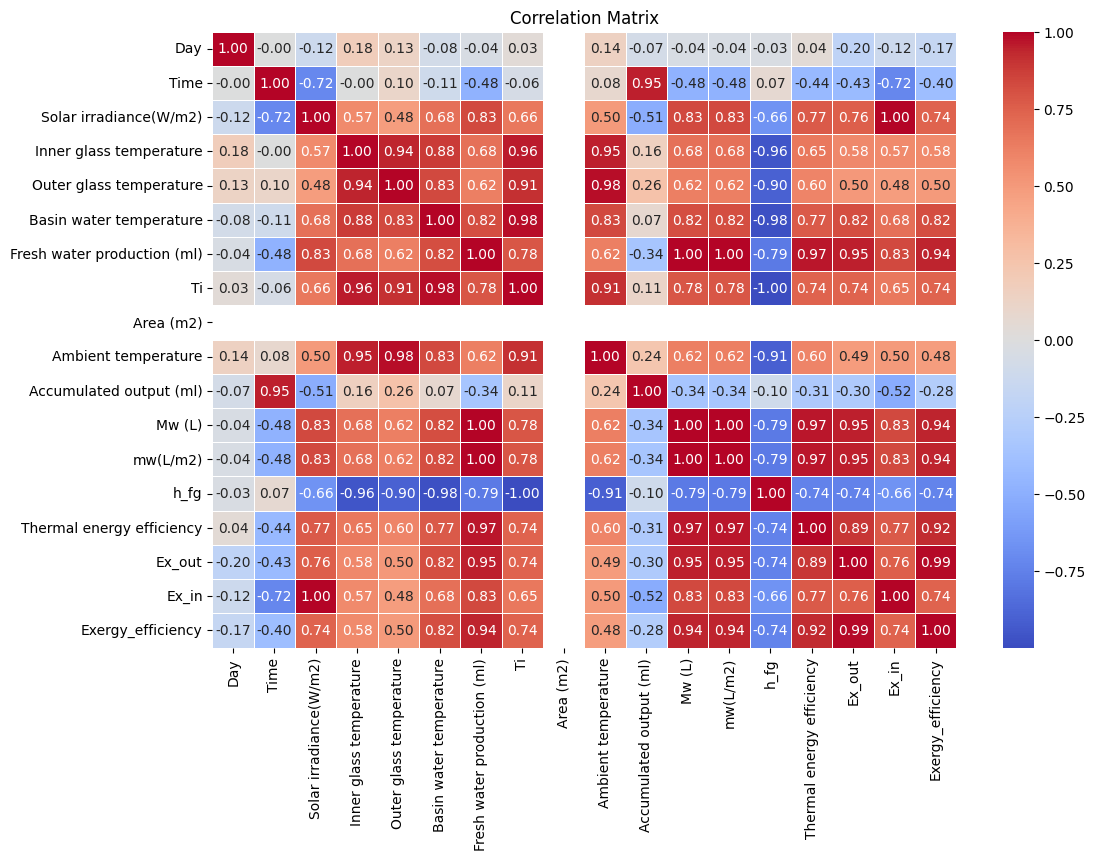

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
features1 = [
    'mw(L/m2)','h_fg','Solar irradiance(W/m2)'
]

In [7]:
df['Temp_Dif'] = df['Outer glass temperature'] - df['Inner glass temperature']

df['mul'] = (df['Basin water temperature']* df['Time'])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, FunctionTransformer
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

df = df.copy()

for col in ['Inner glass temperature', 'Outer glass temperature', 'Basin water temperature']:
    df[col] = df[col].apply(lambda x: x if x > 0 else 0.001)

df['IGT*OGT'] = df['Inner glass temperature'] * df['Outer glass temperature']
df['IGT*BWT'] = df['Inner glass temperature'] * df['Basin water temperature']
df['OGT*BWT'] = df['Outer glass temperature'] * df['Basin water temperature']

df['IGT_log'] = np.log(df['Inner glass temperature'])
df['OGT_log'] = np.log(df['Outer glass temperature'])
df['BWT_log'] = np.log(df['Basin water temperature'])

features = [
    'Inner glass temperature', 'Outer glass temperature', 'Basin water temperature',
    'Temp_Dif', 'mul',
    'IGT*OGT', 'IGT*BWT', 'OGT*BWT',
    'IGT_log', 'OGT_log', 'BWT_log'
]

X = df[features]
y = df['Thermal energy efficiency']

df_clean = pd.concat([X, pd.Series(y, name='energy efficiency')], axis=1).dropna()
X = df_clean.drop(columns=['energy efficiency'])
y = df_clean['energy efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid_svr = {
    'poly__degree': [2, 3],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

pipeline_svr = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', SVR())
])

grid_search_svr = GridSearchCV(pipeline_svr, param_grid_svr, cv=5, scoring='r2', verbose=1)
grid_search_svr.fit(X_train, y_train)
best_model_svr = grid_search_svr.best_estimator_
y_pred_svr = best_model_svr.predict(X_test)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

def calculate_metrics(y_true, y_pred, model=None):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.var(model.named_steps['model'].dual_coef_) if model is not None and hasattr(model.named_steps['model'], 'dual_coef_') else np.nan
    return mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc

mae_svr, r2_svr, rmse_svr, cov_svr, ec_svr, oi_svr, mape_svr, crm_svr, mre_svr, cc_svr, cod_svr, oi_mp_svr, vc_svr = calculate_metrics(y_test, y_pred_svr, best_model_svr)
mae_xgb, r2_xgb, rmse_xgb, cov_xgb, ec_xgb, oi_xgb, mape_xgb, crm_xgb, mre_xgb, cc_xgb, cod_xgb, oi_mp_xgb, vc_xgb = calculate_metrics(y_test, y_pred_xgb)


print("\n--- SVR Metrics ---")
print(f"R² Score: {r2_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")
print(f"MAE: {mae_svr:.4f}")
print(f"COV: {cov_svr:.4f}")
print(f"EC (Nash-Sutcliffe Efficiency): {ec_svr:.4f}")
print(f"OI (Overall Index): {oi_svr:.4f}")
print(f"MAPE: {mape_svr * 100:.2f}%")
print(f"CRM (Coefficient of Residual Mass): {crm_svr:.4f}")
print(f"MRE (Mean Relative Error): {mre_svr:.4f}")
print(f"CC (Correlation Coefficient): {cc_svr:.4f}")
print(f"COD (Coefficient of Determination = CC²): {cod_svr:.4f}")
print(f"OIMP (Alternative Overall Index): {oi_mp_svr:.4f}")
print(f"Variance of Coefficients (VC): {vc_svr:.4f}")

print("\n--- XGBoost Metrics ---")
print(f"R² Score: {r2_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"COV: {cov_xgb:.4f}")
print(f"EC (Nash-Sutcliffe Efficiency): {ec_xgb:.4f}")
print(f"OI (Overall Index): {oi_xgb:.4f}")
print(f"MAPE: {mape_xgb * 100:.2f}%")
print(f"CRM (Coefficient of Residual Mass): {crm_xgb:.4f}")
print(f"MRE (Mean Relative Error): {mre_xgb:.4f}")
print(f"CC (Correlation Coefficient): {cc_xgb:.4f}")
print(f"COD (Coefficient of Determination = CC²): {cod_xgb:.4f}")
print(f"OIMP (Alternative Overall Index): {oi_mp_xgb:.4f}")
print(f"Variance of Coefficients (VC): {vc_xgb}")  # VC is NaN for XGBoost

plt.scatter(y_test, y_pred_svr, alpha=0.7, label='SVR Predictions', color='blue')
plt.scatter(y_test, y_pred_xgb, alpha=0.7, label='XGBoost Predictions', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual energy efficiency")
plt.ylabel("Predicted energy efficiency")
plt.title("Actual vs Predicted energy efficiency (SVR vs XGBoost)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 120 candidates, totalling 600 fits


# SVR VS XGBRegressor

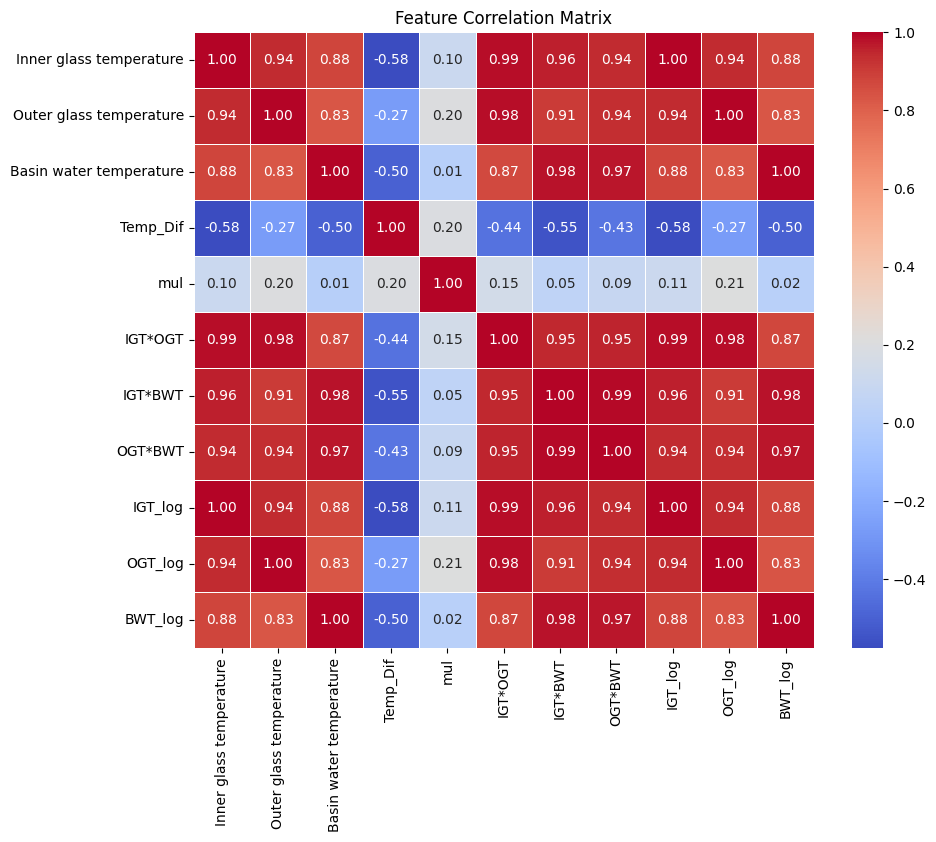

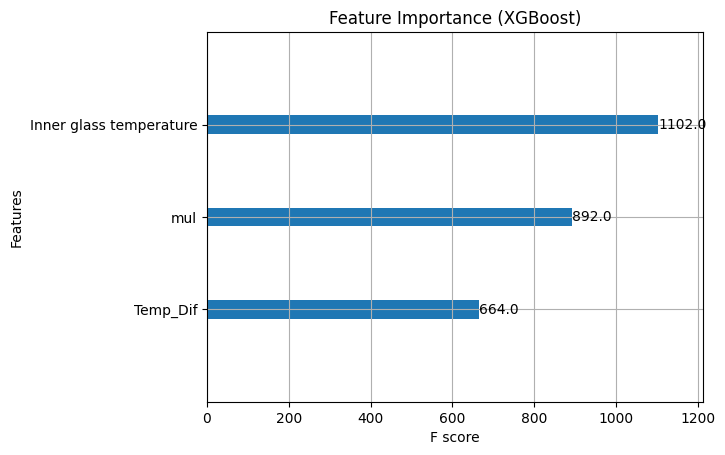

Fitting 5 folds for each of 120 candidates, totalling 600 fits

--- SVR Metrics ---
R² Score: 0.9123
RMSE: 0.1668
MAE: 0.1228
COV: 0.1924
EC (Nash-Sutcliffe Efficiency): 0.9123
OI (Overall Index): 0.9773
MAPE: 34.30%
CRM (Coefficient of Residual Mass): 0.0242
MRE (Mean Relative Error): -0.1578
CC (Correlation Coefficient): 0.9563
COD (Coefficient of Determination = CC²): 0.9145
OIMP (Alternative Overall Index): 0.9773
Variance of Coefficients (VC): 8359.0933

--- XGBoost Metrics ---
R² Score: 0.8901
RMSE: 0.1867
MAE: 0.1471
COV: 0.2154
EC (Nash-Sutcliffe Efficiency): 0.8901
OI (Overall Index): 0.9717
MAPE: 33.71%
CRM (Coefficient of Residual Mass): 0.0032
MRE (Mean Relative Error): -0.1357
CC (Correlation Coefficient): 0.9450
COD (Coefficient of Determination = CC²): 0.8931
OIMP (Alternative Overall Index): 0.9717
Variance of Coefficients (VC): nan


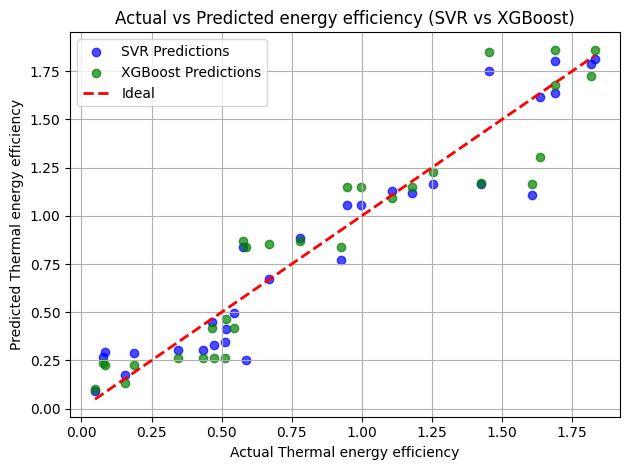

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, FunctionTransformer
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import seaborn as sns

df = df.copy()

for col in ['Inner glass temperature', 'Outer glass temperature', 'Basin water temperature']:
    df[col] = df[col].apply(lambda x: x if x > 0 else 0.001)

df['IGT*OGT'] = df['Inner glass temperature'] * df['Outer glass temperature']
df['IGT*BWT'] = df['Inner glass temperature'] * df['Basin water temperature']
df['OGT*BWT'] = df['Outer glass temperature'] * df['Basin water temperature']

df['IGT_log'] = np.log(df['Inner glass temperature'])
df['OGT_log'] = np.log(df['Outer glass temperature'])
df['BWT_log'] = np.log(df['Basin water temperature'])

features = [
    'Inner glass temperature', 'Outer glass temperature', 'Basin water temperature',
    'Temp_Dif', 'mul',
    'IGT*OGT', 'IGT*BWT', 'OGT*BWT',
    'IGT_log', 'OGT_log', 'BWT_log'
]

X = df[features]
y = df['Thermal energy efficiency']

df_clean = pd.concat([X, pd.Series(y, name='Thermal energy efficiency')], axis=1).dropna()
X = df_clean.drop(columns=['Thermal energy efficiency'])
y = df_clean['Thermal energy efficiency']

corr_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

corr_threshold = 0.8
drop_columns = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname = corr_matrix.columns[i]
            drop_columns.add(colname)

X = X.drop(columns=drop_columns)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X, y)

xgb.plot_importance(xgb_model)
plt.title('Feature Importance (XGBoost)')
plt.show()

important_features = [feature for feature, importance in zip(X.columns, xgb_model.feature_importances_) if importance > 0.01]
X = X[important_features]

pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid_svr = {
    'poly__degree': [2, 3],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

pipeline_svr = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', SVR())
])

grid_search_svr = GridSearchCV(pipeline_svr, param_grid_svr, cv=5, scoring='r2', verbose=1)
grid_search_svr.fit(X_train, y_train)
best_model_svr = grid_search_svr.best_estimator_
y_pred_svr = best_model_svr.predict(X_test)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

def calculate_metrics(y_true, y_pred, model=None):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.var(model.named_steps['model'].dual_coef_) if model is not None and hasattr(model.named_steps['model'], 'dual_coef_') else np.nan
    return mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc

mae_svr, r2_svr, rmse_svr, cov_svr, ec_svr, oi_svr, mape_svr, crm_svr, mre_svr, cc_svr, cod_svr, oi_mp_svr, vc_svr = calculate_metrics(y_test, y_pred_svr, best_model_svr)
mae_xgb, r2_xgb, rmse_xgb, cov_xgb, ec_xgb, oi_xgb, mape_xgb, crm_xgb, mre_xgb, cc_xgb, cod_xgb, oi_mp_xgb, vc_xgb = calculate_metrics(y_test, y_pred_xgb)

print("\n--- SVR Metrics ---")
print(f"R² Score: {r2_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")
print(f"MAE: {mae_svr:.4f}")
print(f"COV: {cov_svr:.4f}")
print(f"EC (Nash-Sutcliffe Efficiency): {ec_svr:.4f}")
print(f"OI (Overall Index): {oi_svr:.4f}")
print(f"MAPE: {mape_svr * 100:.2f}%")
print(f"CRM (Coefficient of Residual Mass): {crm_svr:.4f}")
print(f"MRE (Mean Relative Error): {mre_svr:.4f}")
print(f"CC (Correlation Coefficient): {cc_svr:.4f}")
print(f"COD (Coefficient of Determination = CC²): {cod_svr:.4f}")
print(f"OIMP (Alternative Overall Index): {oi_mp_svr:.4f}")
print(f"Variance of Coefficients (VC): {vc_svr:.4f}")

print("\n--- XGBoost Metrics ---")
print(f"R² Score: {r2_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"COV: {cov_xgb:.4f}")
print(f"EC (Nash-Sutcliffe Efficiency): {ec_xgb:.4f}")
print(f"OI (Overall Index): {oi_xgb:.4f}")
print(f"MAPE: {mape_xgb * 100:.2f}%")
print(f"CRM (Coefficient of Residual Mass): {crm_xgb:.4f}")
print(f"MRE (Mean Relative Error): {mre_xgb:.4f}")
print(f"CC (Correlation Coefficient): {cc_xgb:.4f}")
print(f"COD (Coefficient of Determination = CC²): {cod_xgb:.4f}")
print(f"OIMP (Alternative Overall Index): {oi_mp_xgb:.4f}")
print(f"Variance of Coefficients (VC): {vc_xgb}")  # VC is NaN for XGBoost

# --- Plot Predictions ---
plt.scatter(y_test, y_pred_svr, alpha=0.7, label='SVR Predictions', color='blue')
plt.scatter(y_test, y_pred_xgb, alpha=0.7, label='XGBoost Predictions', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual Thermal energy efficiency")
plt.ylabel("Predicted Thermal energy efficiency")
plt.title("Actual vs Predicted energy efficiency (SVR vs XGBoost)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# SVR and XGBoost for formula related feachers

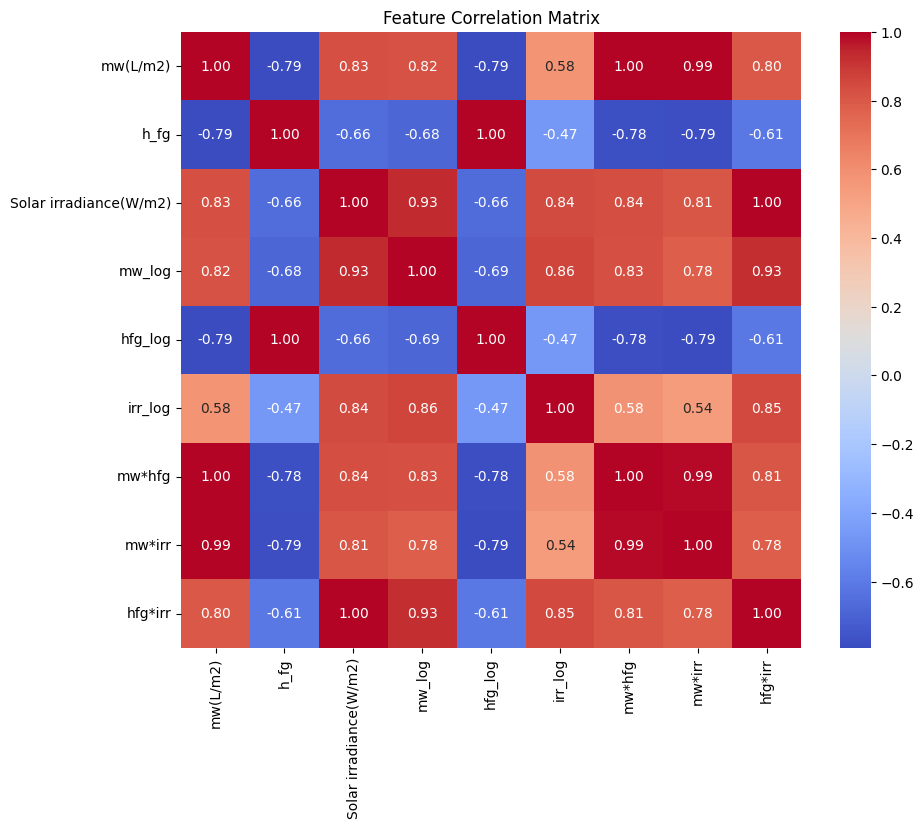

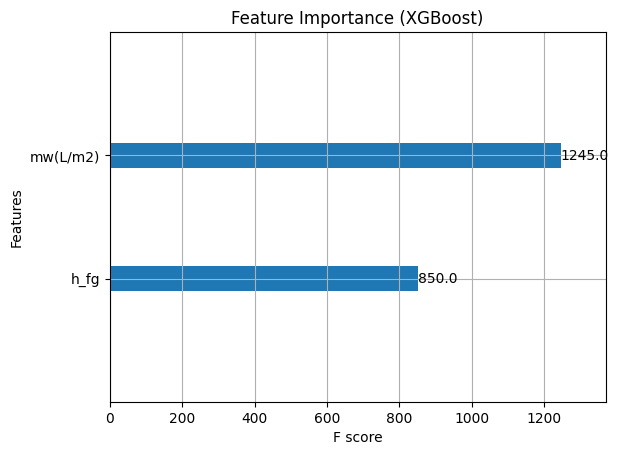

Fitting 5 folds for each of 120 candidates, totalling 600 fits

--- SVR Metrics ---
R² Score: 0.5701
RMSE: 0.3693
MAE: 0.2491
COV: 0.4260
EC: 0.5701
OI: 0.8686
MAPE: 96.60%
CRM: -0.0310
MRE: -0.7750
CC: 0.7621
COD: 0.5808
OIMP: 0.8686
VC: 0.009772306721449778

--- XGBoost Metrics ---
R² Score: 0.2810
RMSE: 0.4776
MAE: 0.3224
COV: 0.5509
EC: 0.2810
OI: 0.8036
MAPE: 120.51%
CRM: 0.0013
MRE: -0.8474
CC: 0.6300
COD: 0.3969
OIMP: 0.8036
VC: nan


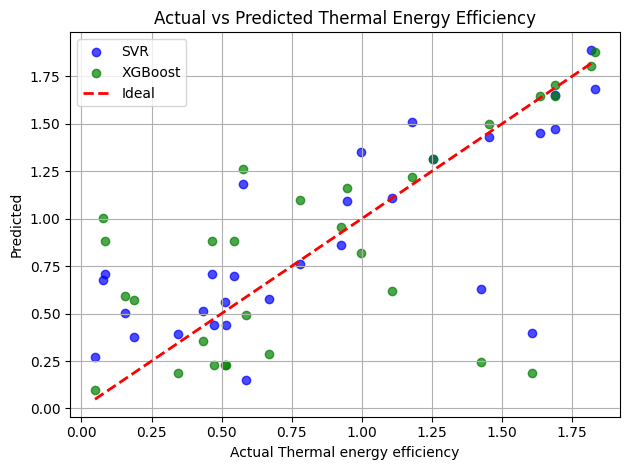

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor, plot_importance

df = df.copy()
for col in ['mw(L/m2)', 'h_fg', 'Solar irradiance(W/m2)']:
    df[col] = df[col].apply(lambda x: x if x > 0 else 0.001)

df['mw_log'] = np.log(df['mw(L/m2)'])
df['hfg_log'] = np.log(df['h_fg'])
df['irr_log'] = np.log(df['Solar irradiance(W/m2)'])

df['mw*hfg'] = df['mw(L/m2)'] * df['h_fg']
df['mw*irr'] = df['mw(L/m2)'] * df['Solar irradiance(W/m2)']
df['hfg*irr'] = df['h_fg'] * df['Solar irradiance(W/m2)']

features = [
    'mw(L/m2)', 'h_fg', 'Solar irradiance(W/m2)',
    'mw_log', 'hfg_log', 'irr_log',
    'mw*hfg', 'mw*irr', 'hfg*irr'
]

X = df[features]
y = df['Thermal energy efficiency']
df_clean = pd.concat([X, y.rename('Thermal energy efficiency')], axis=1).dropna()
X = df_clean.drop(columns=['Thermal energy efficiency'])
y = df_clean['Thermal energy efficiency']

corr = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Matrix")
plt.show()

drop_cols = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            drop_cols.add(corr.columns[i])
X = X.drop(columns=drop_cols)

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X, y)
plot_importance(xgb)
plt.title('Feature Importance (XGBoost)')
plt.show()
X = X[[f for f, imp in zip(X.columns, xgb.feature_importances_) if imp > 0.01]]

X_pca = PCA(n_components=0.95).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', SVR())
])

params = {
    'poly__degree': [2, 3],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__C': [0.1, 1, 10, 100],
    'model__gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

svr_grid = GridSearchCV(pipeline, params, cv=5, scoring='r2', verbose=1)
svr_grid.fit(X_train, y_train)
svr_best = svr_grid.best_estimator_
y_pred_svr = svr_best.predict(X_test)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

def metrics(y_true, y_pred, model=None):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.var(model.named_steps['model'].dual_coef_) if model is not None and hasattr(model.named_steps['model'], 'dual_coef_') else np.nan
    return mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc

svr_metrics = metrics(y_test, y_pred_svr, svr_best)
xgb_metrics = metrics(y_test, y_pred_xgb)

def print_metrics(name, m):
    print(f"\n--- {name} Metrics ---")
    print(f"R² Score: {m[1]:.4f}\nRMSE: {m[2]:.4f}\nMAE: {m[0]:.4f}\nCOV: {m[3]:.4f}")
    print(f"EC: {m[4]:.4f}\nOI: {m[5]:.4f}\nMAPE: {m[6]*100:.2f}%")
    print(f"CRM: {m[7]:.4f}\nMRE: {m[8]:.4f}\nCC: {m[9]:.4f}\nCOD: {m[10]:.4f}")
    print(f"OIMP: {m[11]:.4f}\nVC: {m[12]}")

print_metrics("SVR", svr_metrics)
print_metrics("XGBoost", xgb_metrics)

plt.scatter(y_test, y_pred_svr, label='SVR', color='blue', alpha=0.7)
plt.scatter(y_test, y_pred_xgb, label='XGBoost', color='green', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual Thermal energy efficiency")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Thermal Energy Efficiency")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# MLP

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 379ms/step - loss: 1.2537 - mae: 0.9810 - val_loss: 0.7653 - val_mae: 0.7137
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9645 - mae: 0.8498 - val_loss: 0.6069 - val_mae: 0.6106
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7690 - mae: 0.7409 - val_loss: 0.4814 - val_mae: 0.5467
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6908 - mae: 0.7088 - val_loss: 0.3870 - val_mae: 0.5033
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5542 - mae: 0.6359 - val_loss: 0.3149 - val_mae: 0.4668
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4112 - mae: 0.5440 - val_loss: 0.2637 - val_mae: 0.4259
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3281 - mae: 0.4796 - val_loss: 0.2333 - val_mae: 0.3855
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2694 - mae: 0.4383 - val_loss: 0.2177 - val_mae: 0.3547
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2041 - mae:

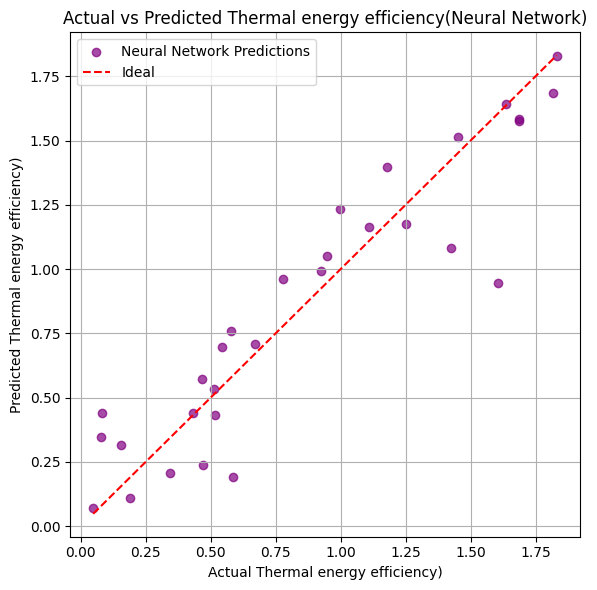

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = df[['Solar irradiance(W/m2)', 'Ambient temperature',
         'Inner glass temperature', 'Outer glass temperature',
         'Basin water temperature']].values
y = df['Thermal energy efficiency'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

y_pred = model.predict(X_test).flatten()

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test))
crm = np.sum(y_test - y_pred) / np.sum(y_test)
mre = np.mean((y_test - y_pred) / y_test)
cc = np.corrcoef(y_test, y_pred)[0, 1]
cod = cc ** 2
cov = rmse / np.mean(y_test)
ec = r2
oi = 1 - (np.sum((y_test - y_pred) ** 2) /
          np.sum((np.abs(y_pred - np.mean(y_test)) + np.abs(y_test - np.mean(y_test))) ** 2))
oi_mp = 1 - (np.sum((y_test - y_pred) ** 2) /
             np.sum((np.abs(y_test - np.mean(y_test)) + np.abs(y_pred - np.mean(y_test))) ** 2))

print("\n--- Neural Network Evaluation Metrics ---")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"CRM: {crm:.4f}")
print(f"MRE: {mre:.4f}")
print(f"Correlation Coefficient (CC): {cc:.4f}")
print(f"Coefficient of Determination (COD): {cod:.4f}")
print(f"Coefficient of Variation (COV): {cov:.4f}")
print(f"Efficiency Coefficient (EC): {ec:.4f}")
print(f"Overall Index (OI): {oi:.4f}")
print(f"Modified OI (OI_mp): {oi_mp:.4f}")

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple', label='Neural Network Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual Thermal energy efficiency)")
plt.ylabel("Predicted Thermal energy efficiency)")
plt.title("Actual vs Predicted Thermal energy efficiency(Neural Network)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# MLP with log transformation

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 309ms/step - loss: 0.8092 - mae: 0.7773 - val_loss: 0.6339 - val_mae: 0.6796
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6013 - mae: 0.6682 - val_loss: 0.4992 - val_mae: 0.6097
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4474 - mae: 0.5716 - val_loss: 0.3812 - val_mae: 0.5309
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3524 - mae: 0.5171 - val_loss: 0.2731 - val_mae: 0.4416
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2249 - mae: 0.4045 - val_loss: 0.1886 - val_mae: 0.3507
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1558 - mae: 0.3297 - val_loss: 0.1282 - val_mae: 0.2654
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0932 - mae: 0.2354 - val_loss: 0.0923 - val_mae: 0.2238
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0654 - mae: 0.2113 - val_loss: 0.0773 - val_mae: 0.2055
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0644 - mae:

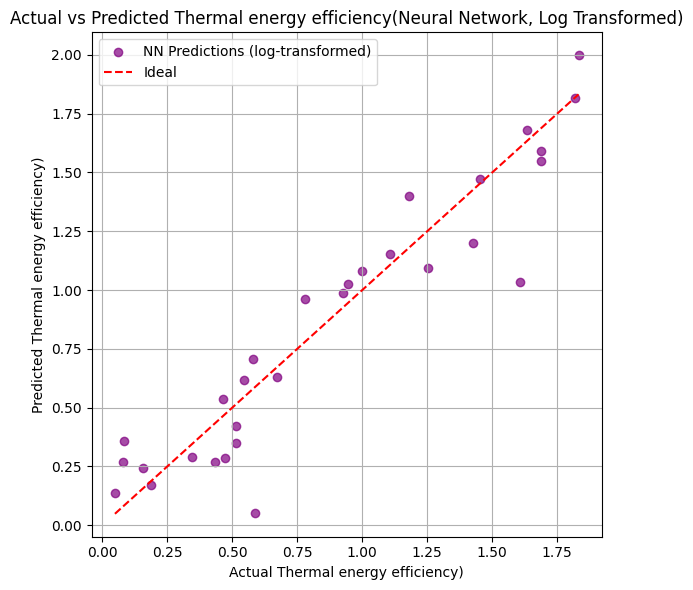

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

features = ['Solar irradiance(W/m2)', 'Ambient temperature',
            'Inner glass temperature', 'Outer glass temperature',
            'Basin water temperature']
X_raw = df[features].values
y_raw = df['Thermal energy efficiency'].values

X_log = np.log1p(X_raw)
y_log = np.log1p(y_raw)

X_train, X_test, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)
y_test = np.expm1(y_test_log)  

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

history = model.fit(X_train, y_train_log,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

y_pred_log = model.predict(X_test).flatten()
y_pred = np.expm1(y_pred_log)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test))
crm = np.sum(y_test - y_pred) / np.sum(y_test)
mre = np.mean((y_test - y_pred) / y_test)
cc = np.corrcoef(y_test, y_pred)[0, 1]
cod = cc ** 2
cov = rmse / np.mean(y_test)
ec = r2
oi = 1 - (np.sum((y_test - y_pred) ** 2) /
          np.sum((np.abs(y_pred - np.mean(y_test)) + np.abs(y_test - np.mean(y_test))) ** 2))
oi_mp = 1 - (np.sum((y_test - y_pred) ** 2) /
             np.sum((np.abs(y_test - np.mean(y_test)) + np.abs(y_pred - np.mean(y_test))) ** 2))

print("\n--- Neural Network Evaluation Metrics with Log-Transformed Features and Target ---")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"CRM: {crm:.4f}")
print(f"MRE: {mre:.4f}")
print(f"Correlation Coefficient (CC): {cc:.4f}")
print(f"Coefficient of Determination (COD): {cod:.4f}")
print(f"Coefficient of Variation (COV): {cov:.4f}")
print(f"Efficiency Coefficient (EC): {ec:.4f}")
print(f"Overall Index (OI): {oi:.4f}")
print(f"Modified OI (OI_mp): {oi_mp:.4f}")

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple', label='NN Predictions (log-transformed)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel("Actual Thermal energy efficiency)")
plt.ylabel("Predicted Thermal energy efficiency)")
plt.title("Actual vs Predicted Thermal energy efficiency(Neural Network, Log Transformed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# XGBoost with log transformation

Fitting 5 folds for each of 72 candidates, totalling 360 fits

--- XGBoost Metrics (Test Set) ---
MAE: 0.0493
R²: 0.9862
RMSE: 0.0662
COV: 0.0764
EC: 0.9862
OI: 0.9965
MAPE: 0.1685
CRM: 0.0300
MRE: -0.0568
CC: 0.9942
COD: 0.9884
OI_MP: 0.9965
VC: nan


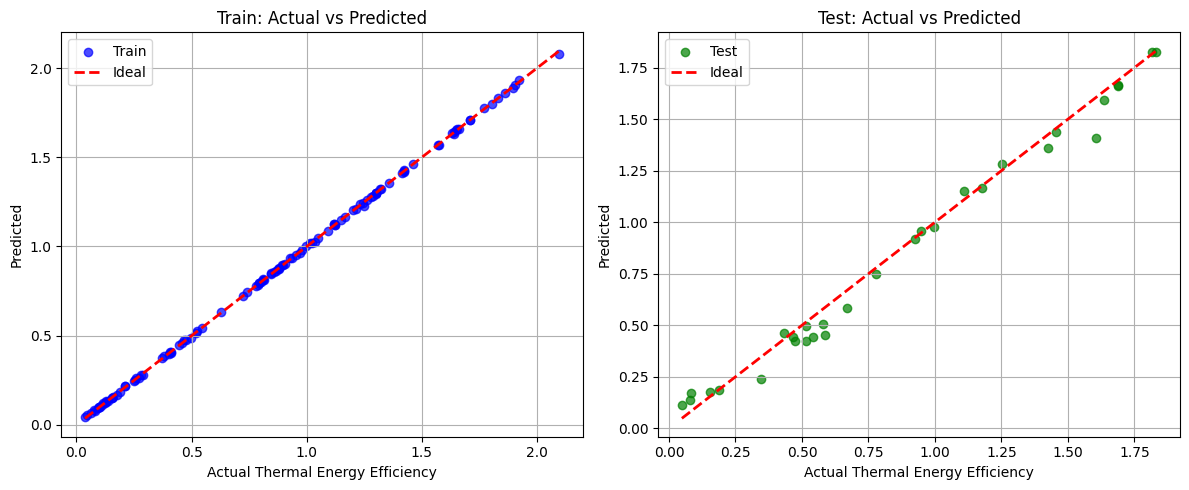

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

df = df.copy()
features = ['Solar irradiance(W/m2)', 'Basin water temperature', 'Ti', 'mw(L/m2)', 'Ex_out', 'Ex_in']
target = 'Thermal energy efficiency'

for col in features:
    df[col] = df[col].apply(lambda x: x if x > 0 else 0.001)
    df[col + '_log'] = np.log(df[col])

X = df[[col + '_log' for col in features]]
y = df[target]

df_clean = pd.concat([X, y.rename('target')], axis=1).dropna()
X = df_clean.drop(columns='target')
y = df_clean['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}
grid = GridSearchCV(xgb, params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)
xgb_best = grid.best_estimator_

y_pred_test = xgb_best.predict(X_test)
y_pred_train = xgb_best.predict(X_train)

def metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc

results = metrics(y_test, y_pred_test)
labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']
print("\n--- XGBoost Metrics (Test Set) ---")
for label, value in zip(labels, results):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual Thermal Energy Efficiency")
plt.ylabel("Predicted")
plt.title("Train: Actual vs Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual Thermal Energy Efficiency")
plt.ylabel("Predicted")
plt.title("Test: Actual vs Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#  Thermal Energy Efficiency ['Solar irradiance(W/m2)', 'Basin water temperature', 'Ti', 'mw(L/m2)', 'Ex_out', 'Ex_in']

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200, 'reg_alpha': 0.1, 'reg_lambda': 1, 'subsample': 0.8}

--- Test Set Metrics ---
MAE: 0.0864
R²: 0.9453
RMSE: 0.1317
COV: 0.1519
EC: 0.9453
OI: 0.9849
MAPE: 0.5332
CRM: 0.0193
MRE: -0.4073
CC: 0.9746
COD: 0.9498
OI_MP: 0.9849
VC: nan


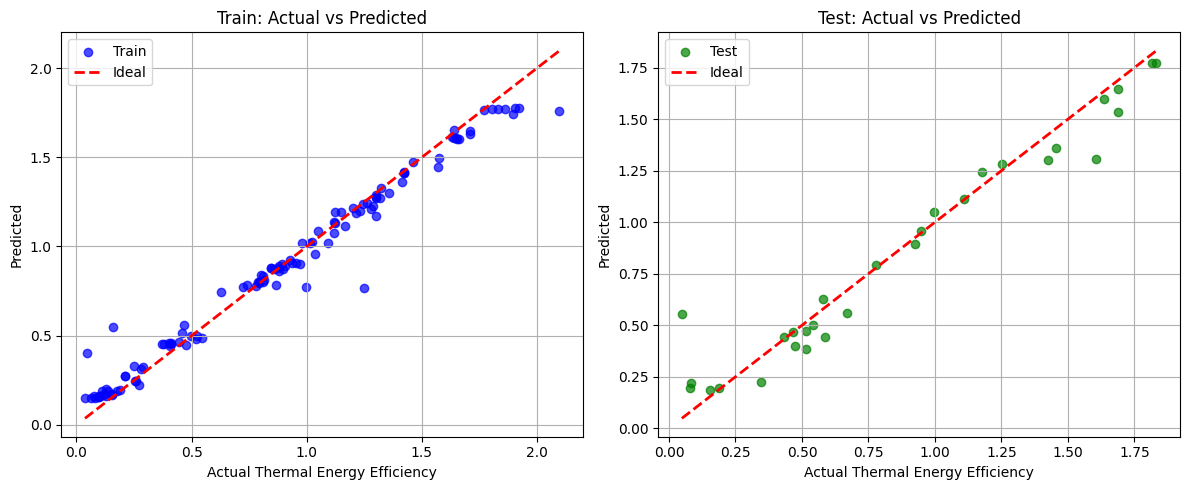

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = df.copy()

features = ['Solar irradiance(W/m2)', 'Basin water temperature', 'Ti', 'mw(L/m2)', 'Ex_out', 'Ex_in']
target = 'Thermal energy efficiency'

for col in features:
    df[col] = df[col].apply(lambda x: x if x > 0 else 0.001)
    df[col + '_log'] = np.log(df[col])

X = df[[col + '_log' for col in features]]
y = df[target]

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(
    objective='reg:squarederror',
    early_stopping_rounds=10,
    eval_metric='rmse',
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_weight': [3, 5],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'reg_alpha': [0.1, 1],
    'reg_lambda': [1, 5]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(xgb, param_grid, cv=cv, scoring='r2', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

best_model = grid.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

print("Best Parameters:", grid.best_params_)
results_test = extended_metrics(y_test, y_pred_test)
print("\n--- Test Set Metrics ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual Thermal Energy Efficiency")
plt.ylabel("Predicted")
plt.title("Train: Actual vs Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual Thermal Energy Efficiency")
plt.ylabel("Predicted")
plt.title("Test: Actual vs Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
df.columns

Index(['Day', 'Time', 'Solar irradiance(W/m2)', 'Inner glass temperature',
       'Outer glass temperature', 'Basin water temperature',
       'Fresh water production (ml)', 'Ti', 'Area (m2)', 'Ambient temperature',
       'Accumulated output (ml)', 'Mw (L)', 'mw(L/m2)', 'h_fg',
       'Thermal energy efficiency', 'Ex_out', 'Ex_in', 'Exergy_efficiency',
       'Solar irradiance(W/m2)_log', 'Basin water temperature_log', 'Ti_log',
       'Thermal energy efficiency_log', 'Ex_out_log', 'Ex_in_log',
       'Exergy_efficiency_log', 'mw(L/m2)_log'],
      dtype='object')

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# Thermal Energy Efficiency with features = ['Solar irradiance(W/m2)', 'Basin water temperature', 'Ti', 'mw(L/m2)', 'Ex_out', 'Ex_in']


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters (SVR): {'C': 100, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}

--- Train Set Metrics (SVR) ---
MAE: 0.0080
R²: 0.9996
RMSE: 0.0104
COV: 0.0118
EC: 0.9996
OI: 0.9999
MAPE: 0.0247
CRM: -0.0007
MRE: -0.0057
CC: 0.9998
COD: 0.9997
OI_MP: 0.9999
VC: nan

--- Test Set Metrics (SVR) ---
MAE: 0.0126
R²: 0.9987
RMSE: 0.0203
COV: 0.0234
EC: 0.9987
OI: 0.9997
MAPE: 0.0755
CRM: -0.0043
MRE: -0.0642
CC: 0.9995
COD: 0.9990
OI_MP: 0.9997
VC: nan


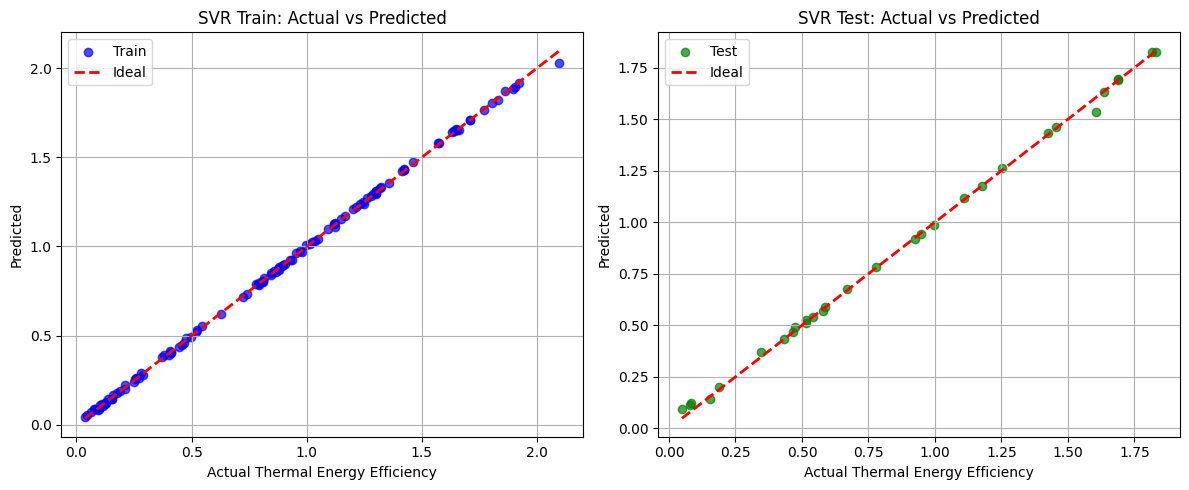

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = df.copy()

features = ['Solar irradiance(W/m2)', 'Basin water temperature', 'Ti', 'mw(L/m2)', 'Ex_out', 'Ex_in']
target = 'Thermal energy efficiency'

for col in features:
    df[col] = df[col].apply(lambda x: x if x > 0 else 0.001)
    df[col + '_log'] = np.log(df[col])

X = df[[col + '_log' for col in features]]
y = df[target]

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR()

param_grid_svr = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_svr = GridSearchCV(svr, param_grid_svr, cv=cv, scoring='r2', n_jobs=-1, verbose=1)
grid_svr.fit(X_train_scaled, y_train)

best_svr = grid_svr.best_estimator_

y_pred_train = best_svr.predict(X_train_scaled)
y_pred_test = best_svr.predict(X_test_scaled)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

print("Best Parameters (SVR):", grid_svr.best_params_)

results_train = extended_metrics(y_train, y_pred_train)
print("\n--- Train Set Metrics (SVR) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test, y_pred_test)
print("\n--- Test Set Metrics (SVR) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual Thermal Energy Efficiency")
plt.ylabel("Predicted")
plt.title("SVR Train: Actual vs Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual Thermal Energy Efficiency")
plt.ylabel("Predicted")
plt.title("SVR Test: Actual vs Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Thermal Energy Efficiency with features = ['Solar irradiance(W/m2)','Outer glass temperature','Inner glass temperature', 'Basin water temperature', 'Ti', 'mw(L/m2)']


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters (SVR): {'C': 100, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}

--- Train Set Metrics (SVR) ---
MAE: 0.0082
R²: 0.9997
RMSE: 0.0088
COV: 0.0100
EC: 0.9997
OI: 0.9999
MAPE: 0.0250
CRM: -0.0003
MRE: -0.0026
CC: 0.9999
COD: 0.9997
OI_MP: 0.9999
VC: nan

--- Test Set Metrics (SVR) ---
MAE: 0.0205
R²: 0.9957
RMSE: 0.0370
COV: 0.0426
EC: 0.9957
OI: 0.9989
MAPE: 0.0855
CRM: 0.0058
MRE: -0.0559
CC: 0.9980
COD: 0.9960
OI_MP: 0.9989
VC: nan


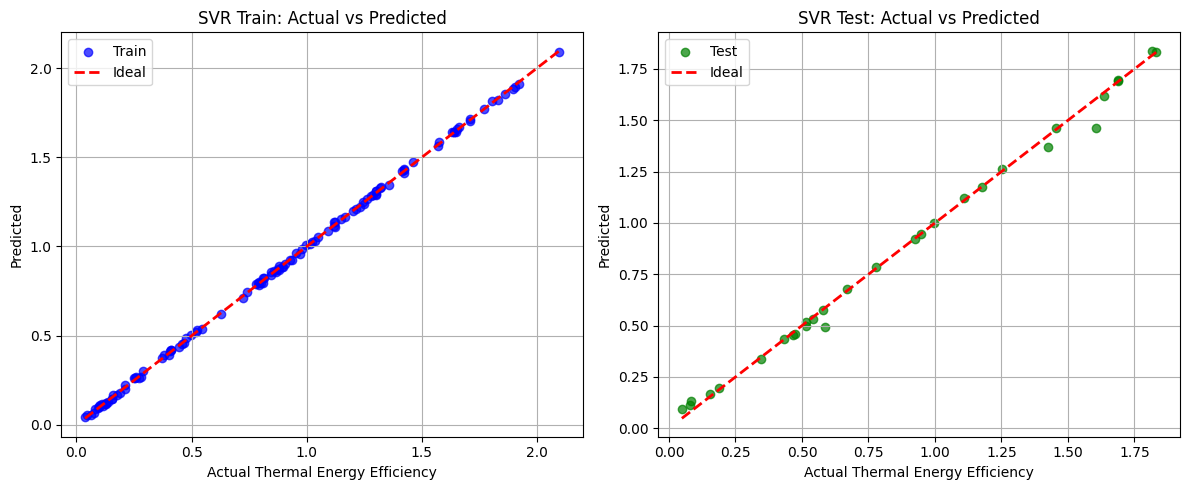

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df1 = df.copy()

features = ['Solar irradiance(W/m2)','Outer glass temperature','Inner glass temperature', 'Basin water temperature', 'Ti', 'mw(L/m2)']
target = 'Thermal energy efficiency'

for col in features:
    df1[col] = df1[col].apply(lambda x: x if x > 0 else 0.001)
    df1[col + '_log'] = np.log(df1[col])

X = df1[[col + '_log' for col in features]]
y = df1[target]

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR()

param_grid_svr = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_svr = GridSearchCV(svr, param_grid_svr, cv=cv, scoring='r2', n_jobs=-1, verbose=1)
grid_svr.fit(X_train_scaled, y_train)

best_svr = grid_svr.best_estimator_

y_pred_train = best_svr.predict(X_train_scaled)
y_pred_test = best_svr.predict(X_test_scaled)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

print("Best Parameters (SVR):", grid_svr.best_params_)

results_train = extended_metrics(y_train, y_pred_train)
print("\n--- Train Set Metrics (SVR) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test, y_pred_test)
print("\n--- Test Set Metrics (SVR) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual Thermal Energy Efficiency")
plt.ylabel("Predicted")
plt.title("SVR Train: Actual vs Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual Thermal Energy Efficiency")
plt.ylabel("Predicted")
plt.title("SVR Test: Actual vs Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



--- Train Set Metrics (Log-Stacking) ---
MAE: 0.0112
R²: 0.9986
RMSE: 0.0210
COV: 0.0240
EC: 0.9986
OI: 0.9996
MAPE: 0.0176
CRM: 0.0039
MRE: 0.0014
CC: 0.9993
COD: 0.9986
OI_MP: 0.9996
VC: nan

--- Test Set Metrics (Log-Stacking) ---
MAE: 0.0287
R²: 0.9942
RMSE: 0.0428
COV: 0.0494
EC: 0.9942
OI: 0.9985
MAPE: 0.0904
CRM: 0.0164
MRE: -0.0264
CC: 0.9974
COD: 0.9949
OI_MP: 0.9985
VC: nan


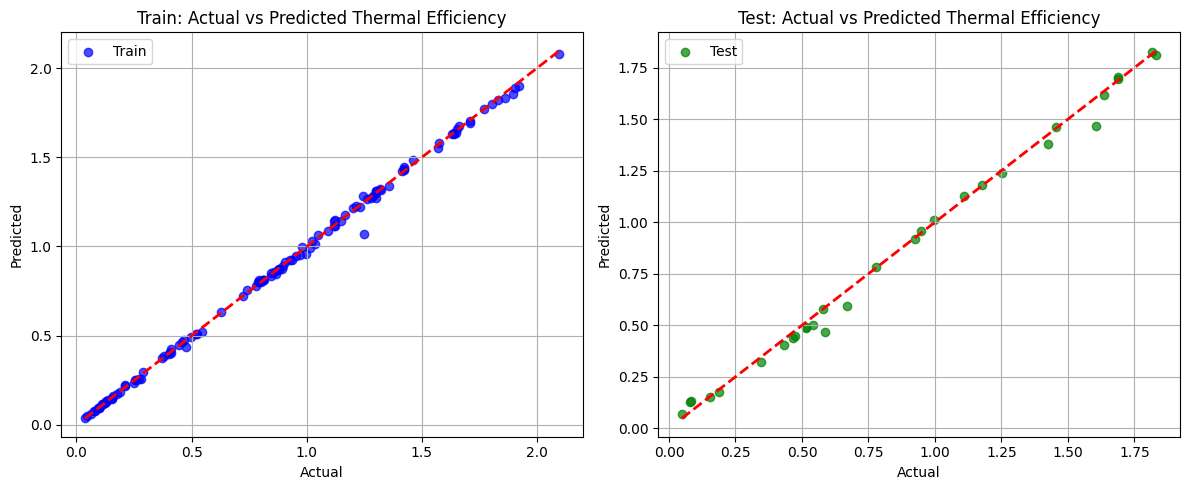

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = df.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'mw(L/m2)']
target = 'Thermal energy efficiency'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

y_pred_train_log = (
    0.5 * pred_svr_train +
    0.2 * pred_rf_train +
    0.2 * pred_xgb_train +
    0.1 * pred_mlp_train
)

y_pred_test_log = (
    0.5 * pred_svr_test +
    0.2 * pred_rf_test +
    0.2 * pred_xgb_test +
    0.1 * pred_mlp_test
)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Thermal Efficiency")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Thermal Efficiency")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Water Production with features = ['Solar irradiance(W/m2)','Outer glass temperature','Inner glass temperature', 'Basin water temperature', 'Ti','Thermal energy efficiency', 'Ex_out', 'Ex_in']

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters (SVR): {'C': 1, 'epsilon': 0.01, 'gamma': 'auto', 'kernel': 'rbf'}

--- Train Set Metrics (SVR) ---
MAE: 0.0134
R²: 0.9589
RMSE: 0.0188
COV: 0.1649
EC: 0.9589
OI: 0.9891
MAPE: 1.2612
CRM: 0.0012
MRE: -1.0029
CC: 0.9796
COD: 0.9596
OI_MP: 0.9891
VC: nan

--- Test Set Metrics (SVR) ---
MAE: 0.0123
R²: 0.9580
RMSE: 0.0200
COV: 0.1775
EC: 0.9580
OI: 0.9894
MAPE: 0.8721
CRM: 0.0356
MRE: -0.5996
CC: 0.9799
COD: 0.9601
OI_MP: 0.9894
VC: nan


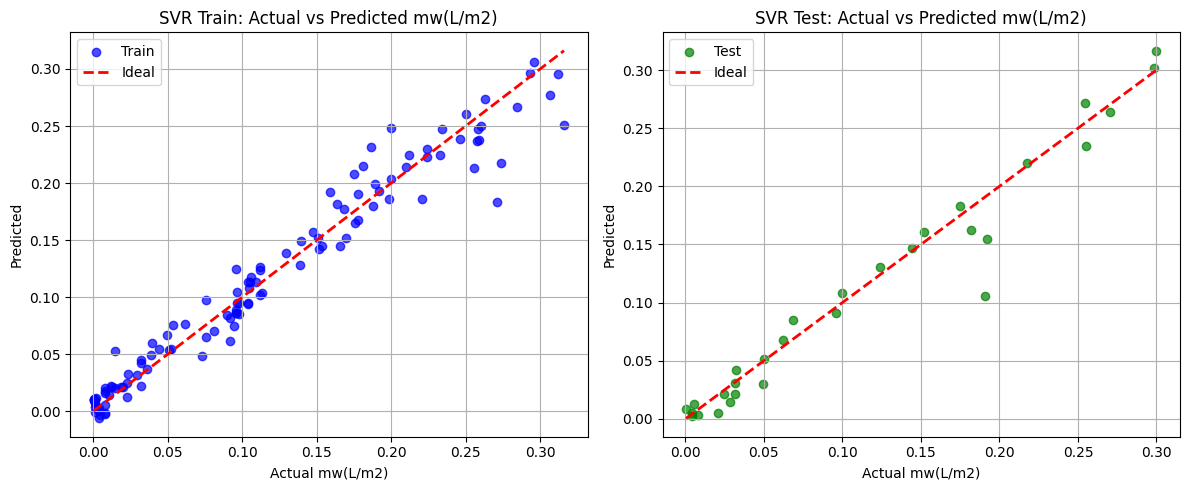

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = df.copy()

features = ['Solar irradiance(W/m2)','Outer glass temperature','Inner glass temperature', 'Basin water temperature', 'Ti','Ex_in','Temp_Dif','mul']

target = 'mw(L/m2)'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target]

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR()
param_grid_svr = {
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}
cv = KFold(n_splits=5, shuffle=True, random_state=42)
grid_svr = GridSearchCV(svr, param_grid_svr, cv=cv, scoring='r2', n_jobs=-1, verbose=1)
grid_svr.fit(X_train_scaled, y_train)
best_svr = grid_svr.best_estimator_

y_pred_train = best_svr.predict(X_train_scaled)
y_pred_test = best_svr.predict(X_test_scaled)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

print("Best Parameters (SVR):", grid_svr.best_params_)

results_train = extended_metrics(y_train, y_pred_train)
print("\n--- Train Set Metrics (SVR) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test, y_pred_test)
print("\n--- Test Set Metrics (SVR) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual mw(L/m2)")
plt.ylabel("Predicted")
plt.title("SVR Train: Actual vs Predicted mw(L/m2)")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual mw(L/m2)")
plt.ylabel("Predicted")
plt.title("SVR Test: Actual vs Predicted mw(L/m2)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



--- Train Set Metrics (Stacking SVR+XGB+RF+MLP) ---
MAE: 0.0134
R²: 0.9498
RMSE: 0.0208
COV: 0.1823
EC: 0.9498
OI: 0.9871
MAPE: 0.6885
CRM: 0.0266
MRE: -0.1596
CC: 0.9751
COD: 0.9509
OI_MP: 0.9871
VC: nan

--- Test Set Metrics (Stacking SVR+XGB+RF+MLP) ---
MAE: 0.0142
R²: 0.9551
RMSE: 0.0206
COV: 0.1835
EC: 0.9551
OI: 0.9886
MAPE: 0.8191
CRM: 0.0306
MRE: -0.5151
CC: 0.9782
COD: 0.9568
OI_MP: 0.9886
VC: nan


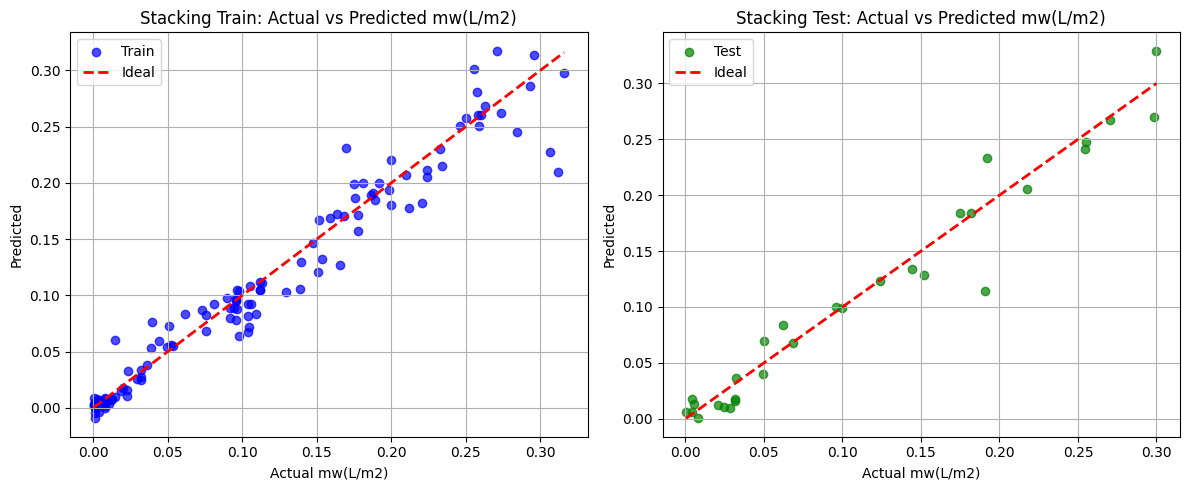

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = df.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Ex_in', 'Temp_Dif', 'mul']
target = 'mw(L/m2)'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target]

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

stacking_model = StackingRegressor(
    estimators=[
        ('svr', svr),
        ('rf', rf),
        ('mlp', mlp),
        ('xgb', xgb)
    ],
    final_estimator=SVR(C=100, epsilon=0.01),
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

stacking_model.fit(X_train_scaled, y_train)

y_pred_train = stacking_model.predict(X_train_scaled)
y_pred_test = stacking_model.predict(X_test_scaled)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

results_train = extended_metrics(y_train, y_pred_train)
print("\n--- Train Set Metrics (Stacking SVR+XGB+RF+MLP) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test, y_pred_test)
print("\n--- Test Set Metrics (Stacking SVR+XGB+RF+MLP) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual mw(L/m2)")
plt.ylabel("Predicted")
plt.title("Stacking Train: Actual vs Predicted mw(L/m2)")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal')
plt.xlabel("Actual mw(L/m2)")
plt.ylabel("Predicted")
plt.title("Stacking Test: Actual vs Predicted mw(L/m2)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



--- Train Set Metrics (Priority-SVR Stacking) ---
MAE: 0.0152
R²: 0.9410
RMSE: 0.0226
COV: 0.1977
EC: 0.9410
OI: 0.9847
MAPE: 1.1203
CRM: 0.0069
MRE: -0.9501
CC: 0.9701
COD: 0.9412
OI_MP: 0.9847
VC: nan

--- Test Set Metrics (Priority-SVR Stacking) ---
MAE: 0.0252
R²: 0.6799
RMSE: 0.0551
COV: 0.4901
EC: 0.6799
OI: 0.9229
MAPE: 0.8283
CRM: -0.0117
MRE: -0.6794
CC: 0.8552
COD: 0.7315
OI_MP: 0.9229
VC: nan


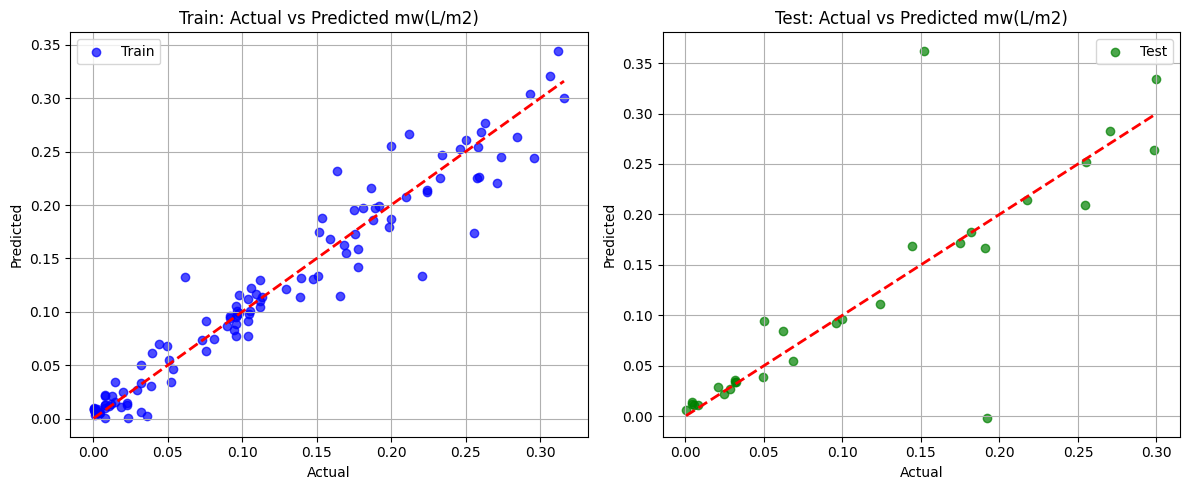

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = df.copy()
features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Ex_in', 'Temp_Dif', 'mul']
target = 'mw(L/m2)'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target]
data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_strong = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
svr_backup = SVR(C=1, epsilon=0.1)
rf = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
xgb = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

stacking_model = StackingRegressor(
    estimators=[
        ('svr1', svr_strong),
        ('svr2', svr_backup),
        ('rf', rf),
        ('xgb', xgb),
        ('mlp', mlp)
    ],
    final_estimator=SVR(C=100, epsilon=0.01),
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

stacking_model.fit(X_train_scaled, y_train)
y_pred_train = stacking_model.predict(X_train_scaled)
y_pred_test = stacking_model.predict(X_test_scaled)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

results_train = extended_metrics(y_train, y_pred_train)
print("\n--- Train Set Metrics (Priority-SVR Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test, y_pred_test)
print("\n--- Test Set Metrics (Priority-SVR Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted mw(L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted mw(L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro


--- Train Set Metrics (Log-Stacking) ---
MAE: 0.0123
R²: 0.9594
RMSE: 0.0187
COV: 0.1639
EC: 0.9594
OI: 0.9893
MAPE: 0.1820
CRM: 0.0432
MRE: -0.0024
CC: 0.9813
COD: 0.9629
OI_MP: 0.9893
VC: nan

--- Test Set Metrics (Log-Stacking) ---
MAE: 0.0145
R²: 0.9466
RMSE: 0.0225
COV: 0.2001
EC: 0.9466
OI: 0.9864
MAPE: 0.3026
CRM: 0.0393
MRE: -0.0571
CC: 0.9742
COD: 0.9491
OI_MP: 0.9864
VC: nan


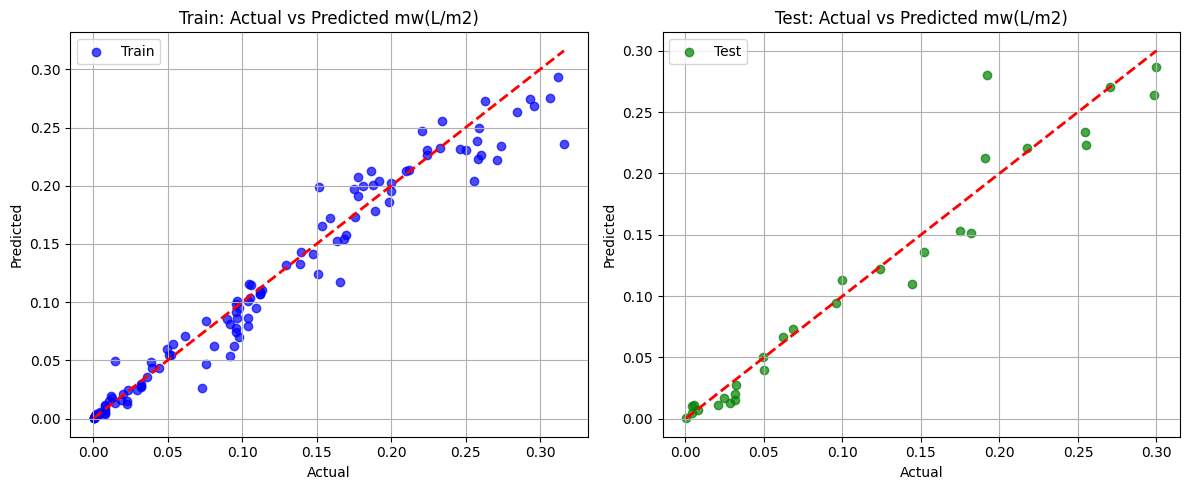

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = df.copy()
features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Ex_in', 'Temp_Dif', 'mul']
target = 'mw(L/m2)'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = np.log(df2[target])  # Log-transform the target

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr1 = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
svr2 = SVR(C=1, epsilon=0.1)
rf = RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
xgb = XGBRegressor(n_estimators=50, learning_rate=0.05, max_depth=3, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)

stacking_model = StackingRegressor(
    estimators=[
        ('svr1', svr1),
        ('svr2', svr2),
        ('rf', rf),
        ('xgb', xgb),
        ('mlp', mlp)
    ],
    final_estimator=SVR(C=100, epsilon=0.01),
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

stacking_model.fit(X_train_scaled, y_train)
y_pred_train_log = stacking_model.predict(X_train_scaled)
y_pred_test_log = stacking_model.predict(X_test_scaled)

y_pred_train = np.exp(y_pred_train_log)
y_pred_test = np.exp(y_pred_test_log)
y_train_actual = np.exp(y_train)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted mw(L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted mw(L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Water yeild prediction uisng ensemble Log Stacking


--- Train Set Metrics (Log-Stacking) ---
MAE: 0.0075
R²: 0.9830
RMSE: 0.0121
COV: 0.1062
EC: 0.9830
OI: 0.9956
MAPE: 0.1086
CRM: 0.0251
MRE: -0.0105
CC: 0.9921
COD: 0.9842
OI_MP: 0.9956
VC: nan

--- Test Set Metrics (Log-Stacking) ---
MAE: 0.0096
R²: 0.9749
RMSE: 0.0154
COV: 0.1372
EC: 0.9749
OI: 0.9936
MAPE: 0.2946
CRM: 0.0504
MRE: -0.0691
CC: 0.9891
COD: 0.9783
OI_MP: 0.9936
VC: nan


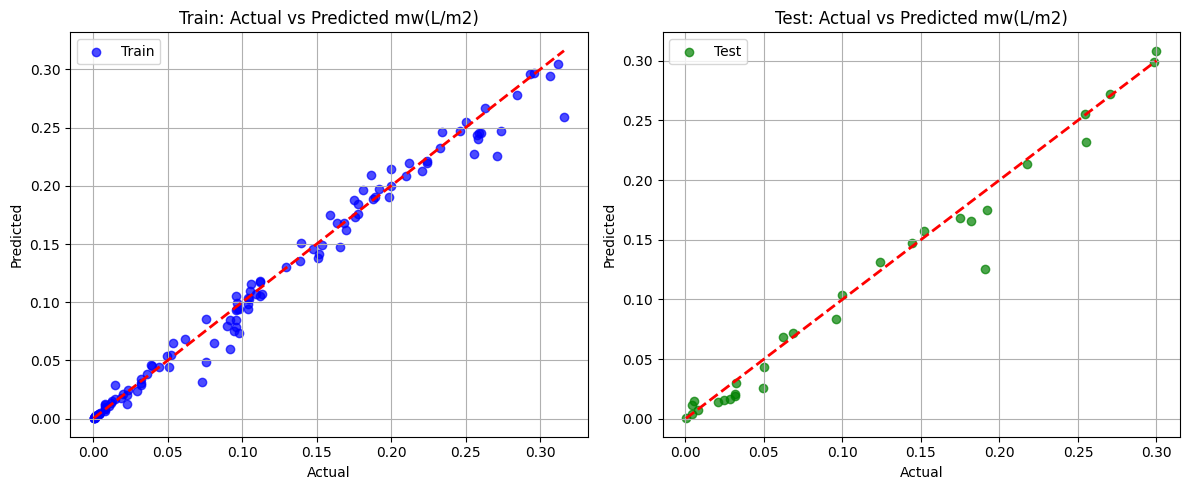

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = df.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Ex_in', 'Temp_Dif', 'mul']
target = 'mw(L/m2)'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

y_pred_train_log = (
    0.5 * pred_svr_train +
    0.2 * pred_rf_train +
    0.2 * pred_xgb_train +
    0.1 * pred_mlp_train
)

y_pred_test_log = (
    0.5 * pred_svr_test +
    0.2 * pred_rf_test +
    0.2 * pred_xgb_test +
    0.1 * pred_mlp_test
)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted mw(L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted mw(L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Thermal Efficiency Prediction using Ensemble Log stacking


--- Train Set Metrics (Log-Stacking) ---
MAE: 0.0112
R²: 0.9986
RMSE: 0.0210
COV: 0.0240
EC: 0.9986
OI: 0.9996
MAPE: 0.0176
CRM: 0.0039
MRE: 0.0014
CC: 0.9993
COD: 0.9986
OI_MP: 0.9996
VC: nan

--- Test Set Metrics (Log-Stacking) ---
MAE: 0.0287
R²: 0.9942
RMSE: 0.0428
COV: 0.0494
EC: 0.9942
OI: 0.9985
MAPE: 0.0904
CRM: 0.0164
MRE: -0.0264
CC: 0.9974
COD: 0.9949
OI_MP: 0.9985
VC: nan


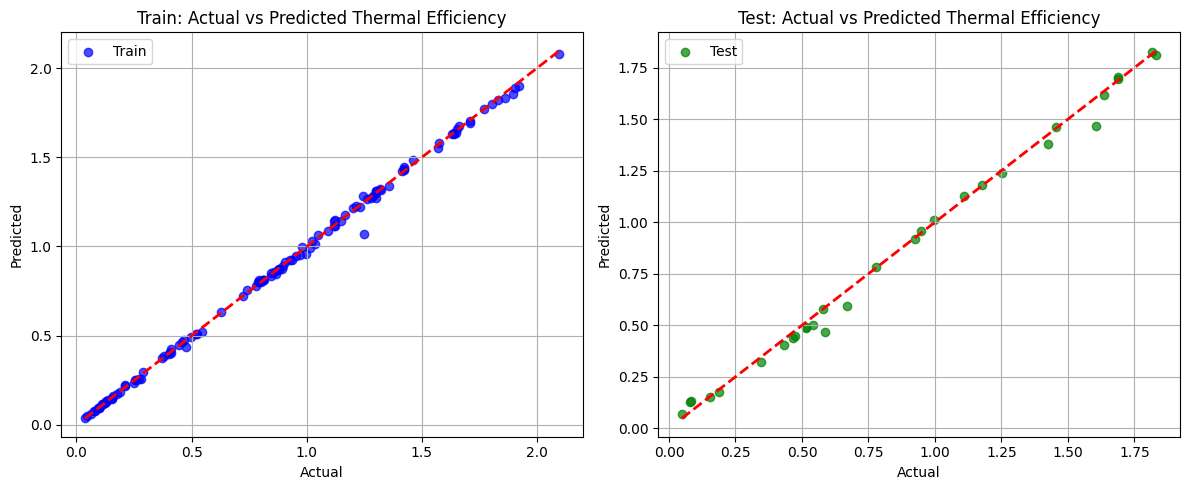

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = df.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'mw(L/m2)']
target = 'Thermal energy efficiency'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

y_pred_train_log = (
    0.5 * pred_svr_train +
    0.2 * pred_rf_train +
    0.2 * pred_xgb_train +
    0.1 * pred_mlp_train
)

y_pred_test_log = (
    0.5 * pred_svr_test +
    0.2 * pred_rf_test +
    0.2 * pred_xgb_test +
    0.1 * pred_mlp_test
)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Log-Stacking) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Thermal Efficiency")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Thermal Efficiency")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Water yeild prediction using Hybrid Model with Ridge Regression as Meta-Learner


--- Train Set Metrics (Hybrid Model with Ridge Regression as Meta-Learner) ---
MAE: 0.0015
R²: 0.9994
RMSE: 0.0023
COV: 0.0206
EC: 0.9994
OI: 0.9998
MAPE: 0.0217
CRM: 0.0006
MRE: -0.0005
CC: 0.9997
COD: 0.9994
OI_MP: 0.9998
VC: nan

--- Test Set Metrics (Hybrid Model with Ridge Regression as Meta-Learner) ---
MAE: 0.0126
R²: 0.9612
RMSE: 0.0192
COV: 0.1706
EC: 0.9612
OI: 0.9901
MAPE: 0.3255
CRM: 0.0484
MRE: -0.1052
CC: 0.9820
COD: 0.9643
OI_MP: 0.9901
VC: nan


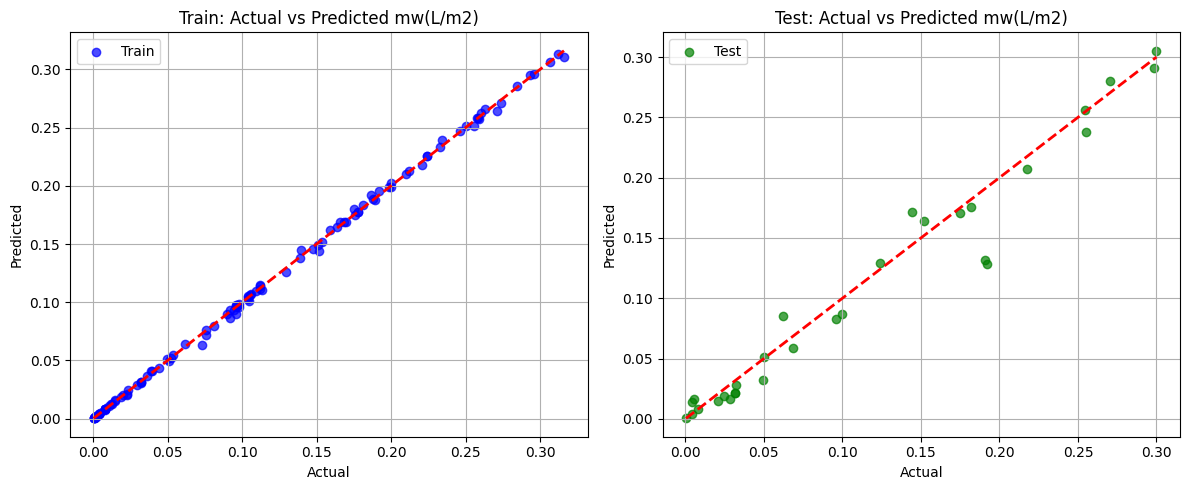

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = df.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'Ex_in', 'Temp_Dif', 'mul']
target = 'mw(L/m2)'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)  # Avoid log(0)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

X_train_meta = np.column_stack((pred_svr_train, pred_rf_train, pred_xgb_train, pred_mlp_train))
X_test_meta = np.column_stack((pred_svr_test, pred_rf_test, pred_xgb_test, pred_mlp_test))

meta_model = Ridge(alpha=1.0)  # Regularization strength
meta_model.fit(X_train_meta, y_train)

y_pred_train_log = meta_model.predict(X_train_meta)
y_pred_test_log = meta_model.predict(X_test_meta)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Hybrid Model with Ridge Regression as Meta-Learner) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Hybrid Model with Ridge Regression as Meta-Learner) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted mw(L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted mw(L/m2)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Energy Efficiency prediction using Hybrid Model with Ridge Regression as Meta-Learner


--- Train Set Metrics (Hybrid Model with Ridge Regression as Meta-Learner) ---
MAE: 0.0106
R²: 0.9990
RMSE: 0.0172
COV: 0.0197
EC: 0.9990
OI: 0.9998
MAPE: 0.0164
CRM: 0.0004
MRE: -0.0003
CC: 0.9995
COD: 0.9990
OI_MP: 0.9998
VC: nan

--- Test Set Metrics (Hybrid Model with Ridge Regression as Meta-Learner) ---
MAE: 0.0310
R²: 0.9935
RMSE: 0.0455
COV: 0.0525
EC: 0.9935
OI: 0.9984
MAPE: 0.1044
CRM: 0.0165
MRE: -0.0321
CC: 0.9971
COD: 0.9941
OI_MP: 0.9984
VC: nan


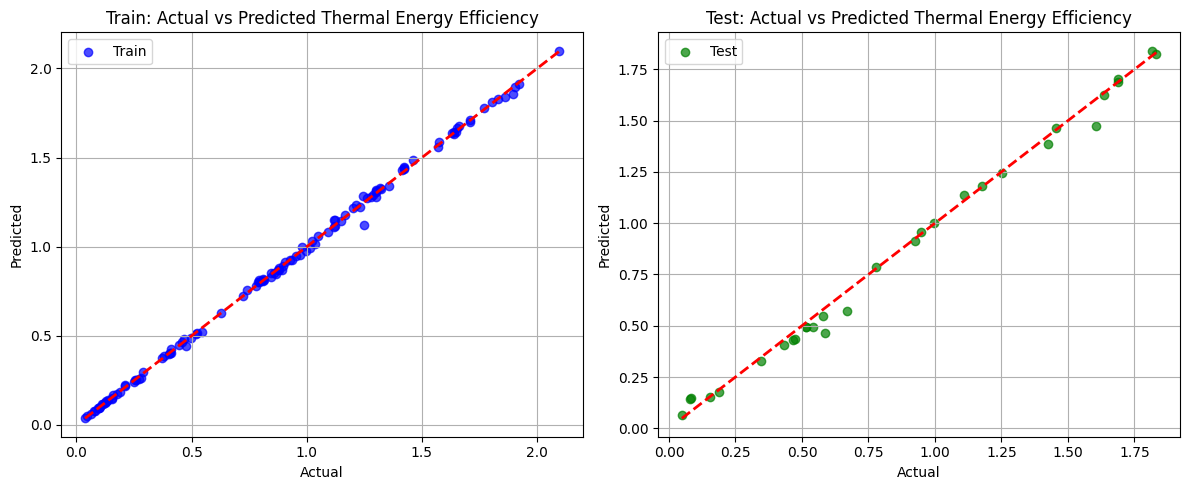

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df2 = df.copy()

features = ['Solar irradiance(W/m2)', 'Outer glass temperature', 'Inner glass temperature',
            'Basin water temperature', 'Ti', 'mw(L/m2)']
target = 'Thermal energy efficiency'

for col in features + [target]:
    df2[col] = df2[col].apply(lambda x: x if x > 0 else 0.001)  # Avoid log(0)
    df2[col + '_log'] = np.log(df2[col])

X = df2[[col + '_log' for col in features]]
y = df2[target + '_log']

data = pd.concat([X, y.rename('target')], axis=1).dropna()
X = data.drop(columns='target')
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(C=10, epsilon=0.01, kernel='rbf', gamma='scale')
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

svr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
xgb.fit(X_train_scaled, y_train)
mlp.fit(X_train_scaled, y_train)

pred_svr_train = svr.predict(X_train_scaled)
pred_rf_train = rf.predict(X_train_scaled)
pred_xgb_train = xgb.predict(X_train_scaled)
pred_mlp_train = mlp.predict(X_train_scaled)

pred_svr_test = svr.predict(X_test_scaled)
pred_rf_test = rf.predict(X_test_scaled)
pred_xgb_test = xgb.predict(X_test_scaled)
pred_mlp_test = mlp.predict(X_test_scaled)

X_train_meta = np.column_stack((pred_svr_train, pred_rf_train, pred_xgb_train, pred_mlp_train))
X_test_meta = np.column_stack((pred_svr_test, pred_rf_test, pred_xgb_test, pred_mlp_test))

meta_model = Ridge(alpha=1.0)  # Regularization strength
meta_model.fit(X_train_meta, y_train)

y_pred_train_log = meta_model.predict(X_train_meta)
y_pred_test_log = meta_model.predict(X_test_meta)

y_pred_train = np.exp(y_pred_train_log)
y_train_actual = np.exp(y_train)

y_pred_test = np.exp(y_pred_test_log)
y_test_actual = np.exp(y_test)

def extended_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    crm = np.sum(y_true - y_pred) / np.sum(y_true)
    mre = np.mean((y_true - y_pred) / y_true)
    cc = np.corrcoef(y_true, y_pred)[0, 1]
    cod = cc ** 2
    cov = rmse / np.mean(y_true)
    ec = r2
    oi = 1 - (np.sum((y_true - y_pred) ** 2) /
              np.sum((np.abs(y_pred - np.mean(y_true)) + np.abs(y_true - np.mean(y_true))) ** 2))
    oi_mp = 1 - (np.sum((y_true - y_pred) ** 2) /
                 np.sum((np.abs(y_true - np.mean(y_true)) + np.abs(y_pred - np.mean(y_true))) ** 2))
    vc = np.nan
    return [mae, r2, rmse, cov, ec, oi, mape, crm, mre, cc, cod, oi_mp, vc]

labels = ['MAE', 'R²', 'RMSE', 'COV', 'EC', 'OI', 'MAPE', 'CRM', 'MRE', 'CC', 'COD', 'OI_MP', 'VC']

results_train = extended_metrics(y_train_actual, y_pred_train)
print("\n--- Train Set Metrics (Hybrid Model with Ridge Regression as Meta-Learner) ---")
for label, value in zip(labels, results_train):
    print(f"{label}: {value:.4f}")

results_test = extended_metrics(y_test_actual, y_pred_test)
print("\n--- Test Set Metrics (Hybrid Model with Ridge Regression as Meta-Learner) ---")
for label, value in zip(labels, results_test):
    print(f"{label}: {value:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_actual, y_pred_train, color='blue', alpha=0.7, label='Train')
plt.plot([y_train_actual.min(), y_train_actual.max()], [y_train_actual.min(), y_train_actual.max()], 'r--', lw=2)
plt.title("Train: Actual vs Predicted Thermal Energy Efficiency")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test_actual, y_pred_test, color='green', alpha=0.7, label='Test')
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.title("Test: Actual vs Predicted Thermal Energy Efficiency")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# Evaluation Dataframe

In [23]:
import pandas as pd

# Data for the comparison table
data = {
    'Metrics': ['Train MAE', 'Test MAE', 'Train R²', 'Test R²', 'Train RMSE', 'Test RMSE', 
                'Train COV', 'Test COV', 'Train EC', 'Test EC', 'Train OI', 'Test OI', 
                'Train MAPE', 'Test MAPE', 'Train CRM', 'Test CRM', 'Train MRE', 'Test MRE', 
                'Train CC', 'Test CC', 'Train COD', 'Test COD', 'Train OI_MP', 'Test OI_MP', 
                'Train VC', 'Test VC'],
    'Water Yield Prediction (Hybrid Model with Ridge Regression)': [
        0.0112, 0.0287, 0.9986, 0.9942, 0.0210, 0.0428, 0.0240, 0.0494, 0.9986, 0.9942, 
        0.9996, 0.9985, 0.0176, 0.0904, 0.0039, 0.0164, 0.0014, -0.0264, 0.9993, 0.9974, 
        0.9986, 0.9949, 0.9996, 0.9985, None, None],
    'Energy Efficiency Prediction (Hybrid Model with Ridge Regression)': [
        0.0106, 0.0310, 0.9990, 0.9935, 0.0172, 0.0455, 0.0197, 0.0525, 0.9990, 0.9935, 
        0.9998, 0.9984, 0.0164, 0.1044, 0.0004, 0.0165, -0.0003, -0.0321, 0.9995, 0.9971, 
        0.9990, 0.9941, 0.9998, 0.9984, None, None],
    'Water Yield Prediction (Ensemble Log Stacking)': [
        0.0075, 0.0096, 0.9830, 0.9749, 0.0121, 0.0154, 0.1062, 0.1372, 0.9830, 0.9749, 
        0.9956, 0.9936, 0.1086, 0.2946, 0.0251, 0.0504, -0.0105, -0.0691, 0.9921, 0.9891, 
        0.9842, 0.9783, 0.9956, 0.9936, None, None],
    'Thermal Efficiency Prediction (Ensemble Log Stacking)': [
        0.0112, 0.0287, 0.9986, 0.9942, 0.0210, 0.0428, 0.0240, 0.0494, 0.9986, 0.9942, 
        0.9996, 0.9985, 0.0176, 0.0904, 0.0039, 0.0164, 0.0014, -0.0264, 0.9993, 0.9974, 
        0.9986, 0.9949, 0.9996, 0.9985, None, None]
}

df_comparison = pd.DataFrame(data)

output_file_path = '/kaggle/working/model_comparison.xlsx'
df_comparison.to_excel(output_file_path, index=False)

output_file_path


'/kaggle/working/model_comparison.xlsx'

In [26]:
df_comparison.head(5)

,Metrics,Water Yield Prediction (Hybrid Model with Ridge Regression),Energy Efficiency Prediction (Hybrid Model with Ridge Regression),Water Yield Prediction (Ensemble Log Stacking),Thermal Efficiency Prediction (Ensemble Log Stacking)
0,Train MAE,0.0112,0.0106,0.0075,0.0112
1,Test MAE,0.0287,0.0310,0.0096,0.0287
2,Train R²,0.9986,0.9990,0.9830,0.9986
3,Test R²,0.9942,0.9935,0.9749,0.9942
4,Train RMSE,0.0210,0.0172,0.0121,0.0210


# Evaluation Graph

<Figure size 2000x2500 with 0 Axes>

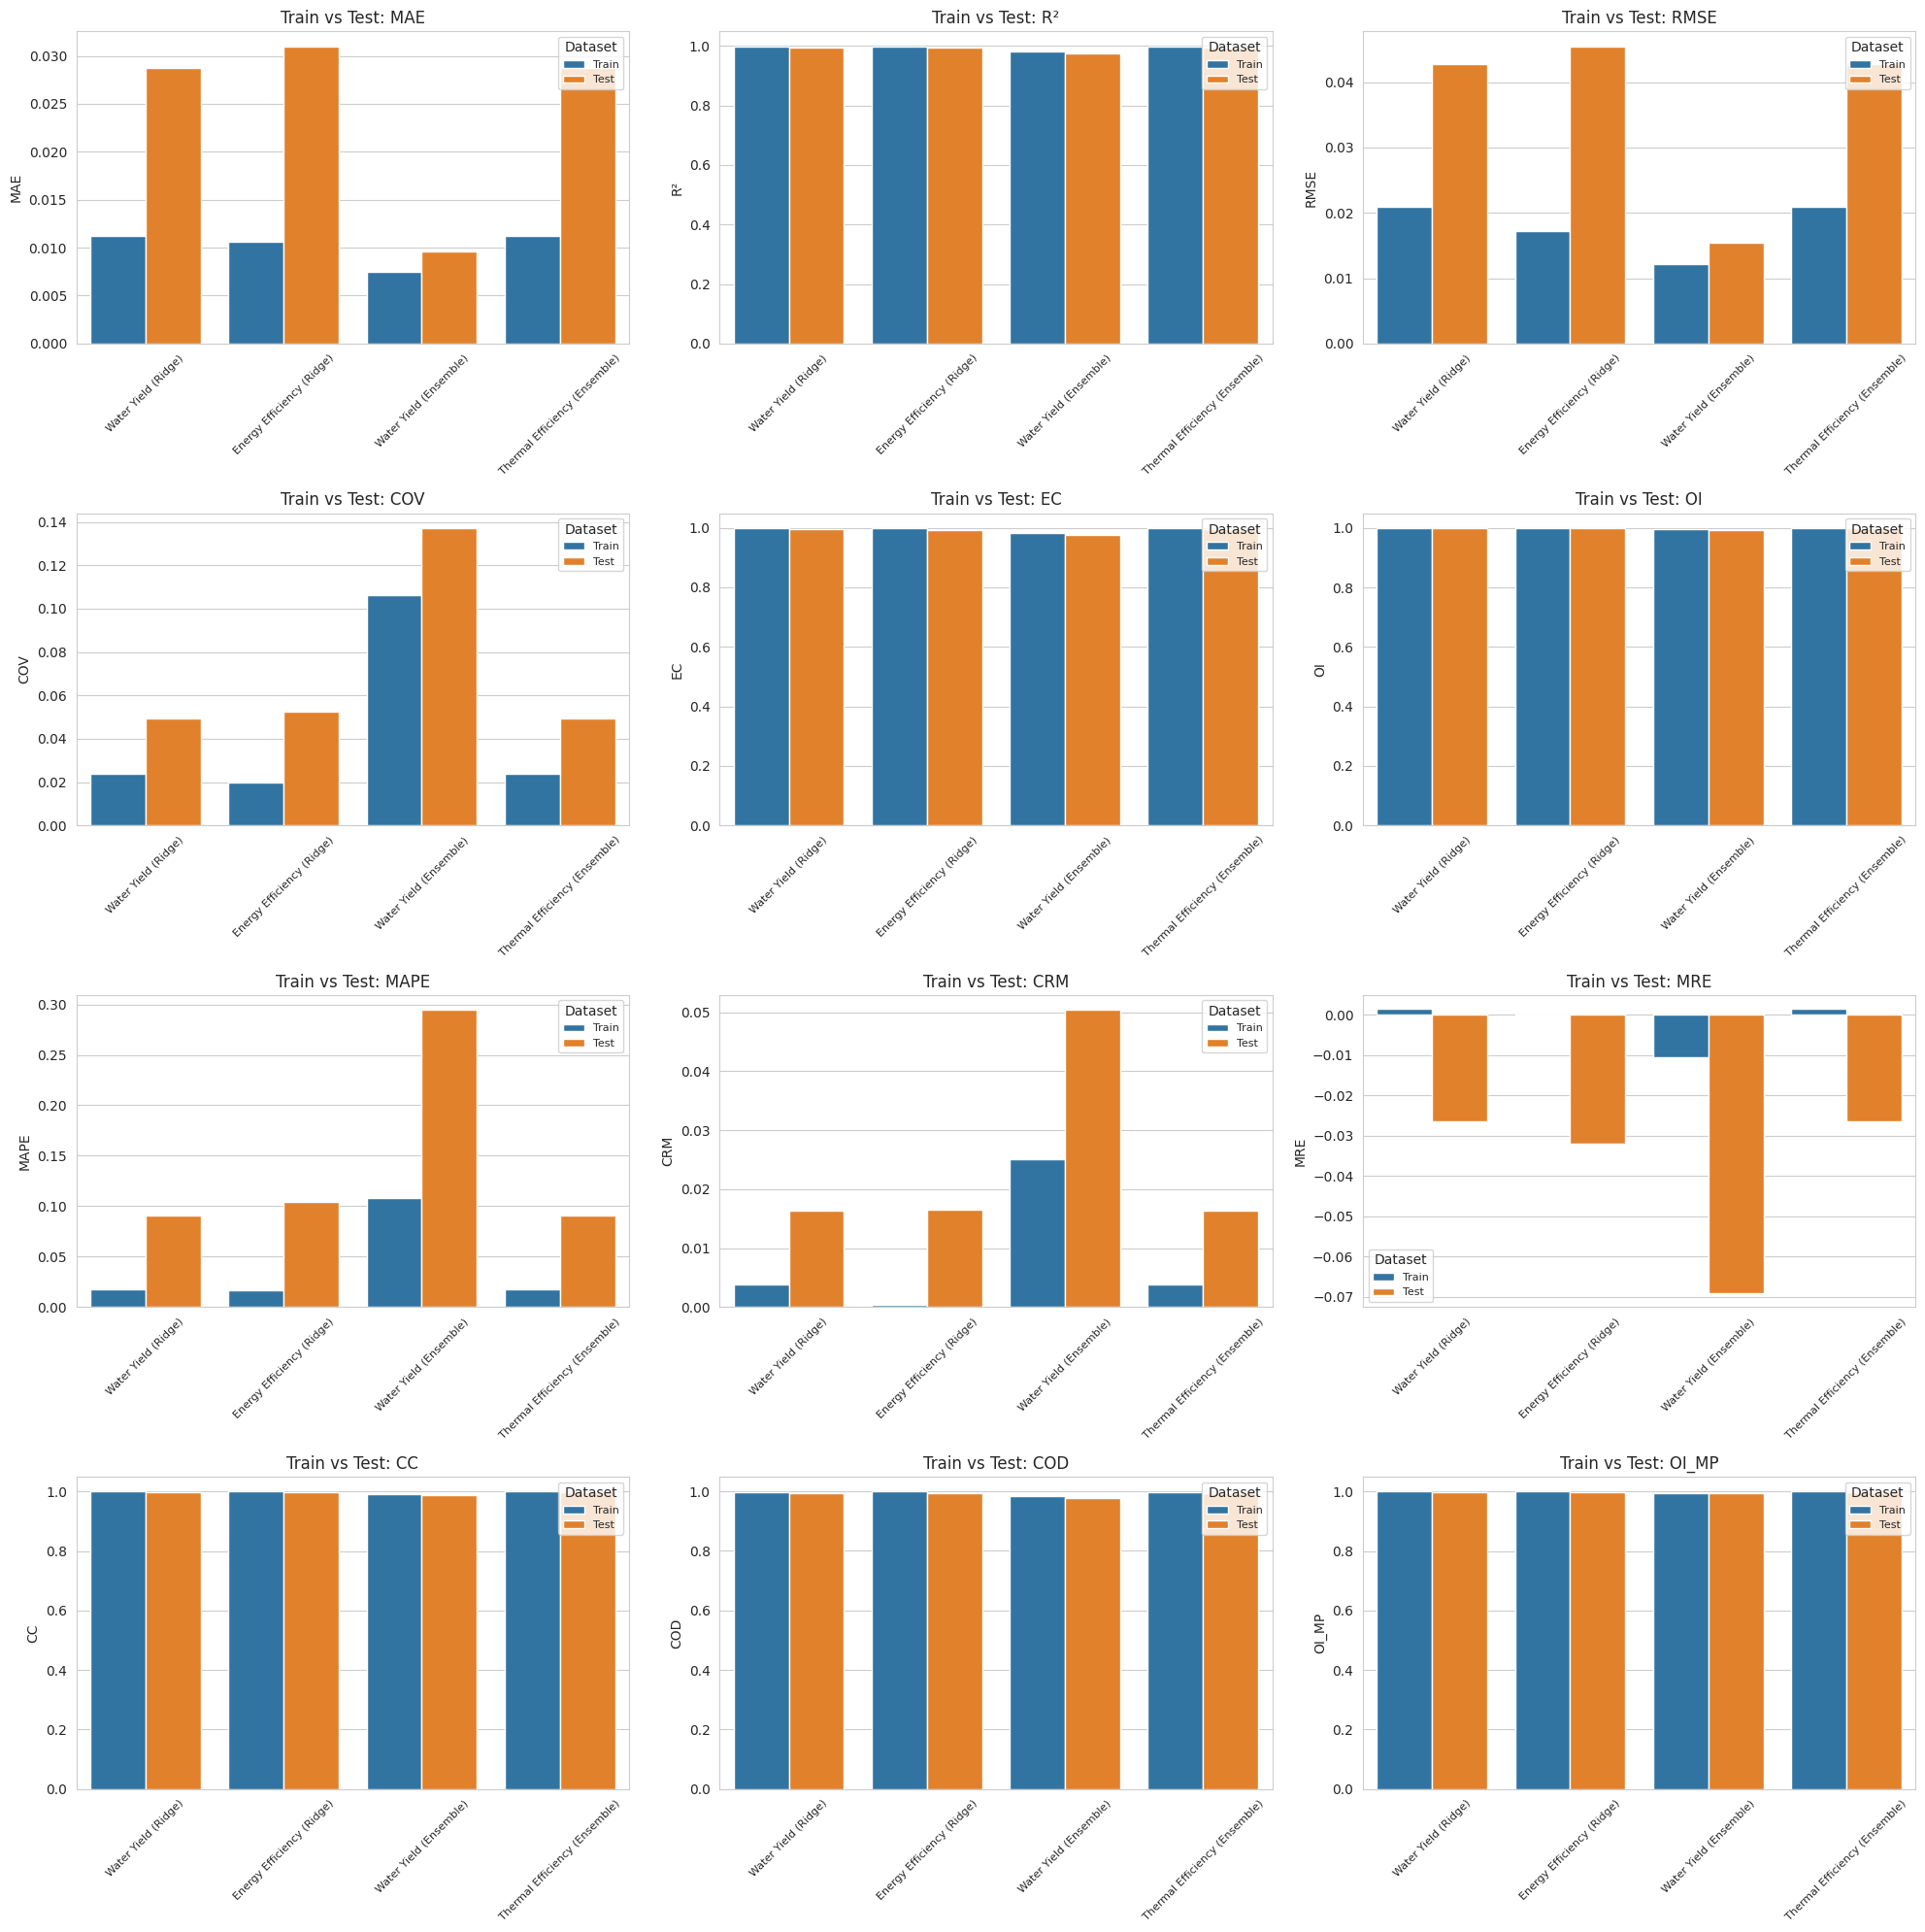

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Metrics': ['Train MAE', 'Test MAE', 'Train R²', 'Test R²', 'Train RMSE', 'Test RMSE', 
                'Train COV', 'Test COV', 'Train EC', 'Test EC', 'Train OI', 'Test OI', 
                'Train MAPE', 'Test MAPE', 'Train CRM', 'Test CRM', 'Train MRE', 'Test MRE', 
                'Train CC', 'Test CC', 'Train COD', 'Test COD', 'Train OI_MP', 'Test OI_MP', 
                'Train VC', 'Test VC'],
    'Water Yield Prediction (Hybrid Model with Ridge Regression)': [
        0.0112, 0.0287, 0.9986, 0.9942, 0.0210, 0.0428, 0.0240, 0.0494, 0.9986, 0.9942, 
        0.9996, 0.9985, 0.0176, 0.0904, 0.0039, 0.0164, 0.0014, -0.0264, 0.9993, 0.9974, 
        0.9986, 0.9949, 0.9996, 0.9985, None, None],
    'Energy Efficiency Prediction (Hybrid Model with Ridge Regression)': [
        0.0106, 0.0310, 0.9990, 0.9935, 0.0172, 0.0455, 0.0197, 0.0525, 0.9990, 0.9935, 
        0.9998, 0.9984, 0.0164, 0.1044, 0.0004, 0.0165, -0.0003, -0.0321, 0.9995, 0.9971, 
        0.9990, 0.9941, 0.9998, 0.9984, None, None],
    'Water Yield Prediction (Ensemble Log Stacking)': [
        0.0075, 0.0096, 0.9830, 0.9749, 0.0121, 0.0154, 0.1062, 0.1372, 0.9830, 0.9749, 
        0.9956, 0.9936, 0.1086, 0.2946, 0.0251, 0.0504, -0.0105, -0.0691, 0.9921, 0.9891, 
        0.9842, 0.9783, 0.9956, 0.9936, None, None],
    'Thermal Efficiency Prediction (Ensemble Log Stacking)': [
        0.0112, 0.0287, 0.9986, 0.9942, 0.0210, 0.0428, 0.0240, 0.0494, 0.9986, 0.9942, 
        0.9996, 0.9985, 0.0176, 0.0904, 0.0039, 0.0164, 0.0014, -0.0264, 0.9993, 0.9974, 
        0.9986, 0.9949, 0.9996, 0.9985, None, None]
}

df_comparison = pd.DataFrame(data)

df_melted = df_comparison.melt(id_vars='Metrics', var_name='Model', value_name='Value')

df_melted[['Dataset', 'Metric']] = df_melted['Metrics'].str.split(' ', n=1, expand=True)
df_melted.drop('Metrics', axis=1, inplace=True)

df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

model_names = {
    'Water Yield Prediction (Hybrid Model with Ridge Regression)': 'Water Yield (Ridge)',
    'Energy Efficiency Prediction (Hybrid Model with Ridge Regression)': 'Energy Efficiency (Ridge)',
    'Water Yield Prediction (Ensemble Log Stacking)': 'Water Yield (Ensemble)',
    'Thermal Efficiency Prediction (Ensemble Log Stacking)': 'Thermal Efficiency (Ensemble)'
}
df_melted['Model'] = df_melted['Model'].map(model_names)

valid_metrics = []
for metric in df_melted['Metric'].unique():
    if not df_melted[df_melted['Metric'] == metric]['Value'].isna().all():
        valid_metrics.append(metric)

sns.set_style("whitegrid")
plt.figure(figsize=(20, 25))
n_cols = 3
n_rows = (len(valid_metrics) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, metric in enumerate(valid_metrics):
    ax = axes[i]
    subset = df_melted[df_melted['Metric'] == metric]
    sns.barplot(x='Model', y='Value', hue='Dataset', data=subset, ax=ax)
    ax.set_title(f'Train vs Test: {metric}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel(metric, fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.legend(title='Dataset', fontsize=8)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

<Figure size 1000x6000 with 0 Axes>

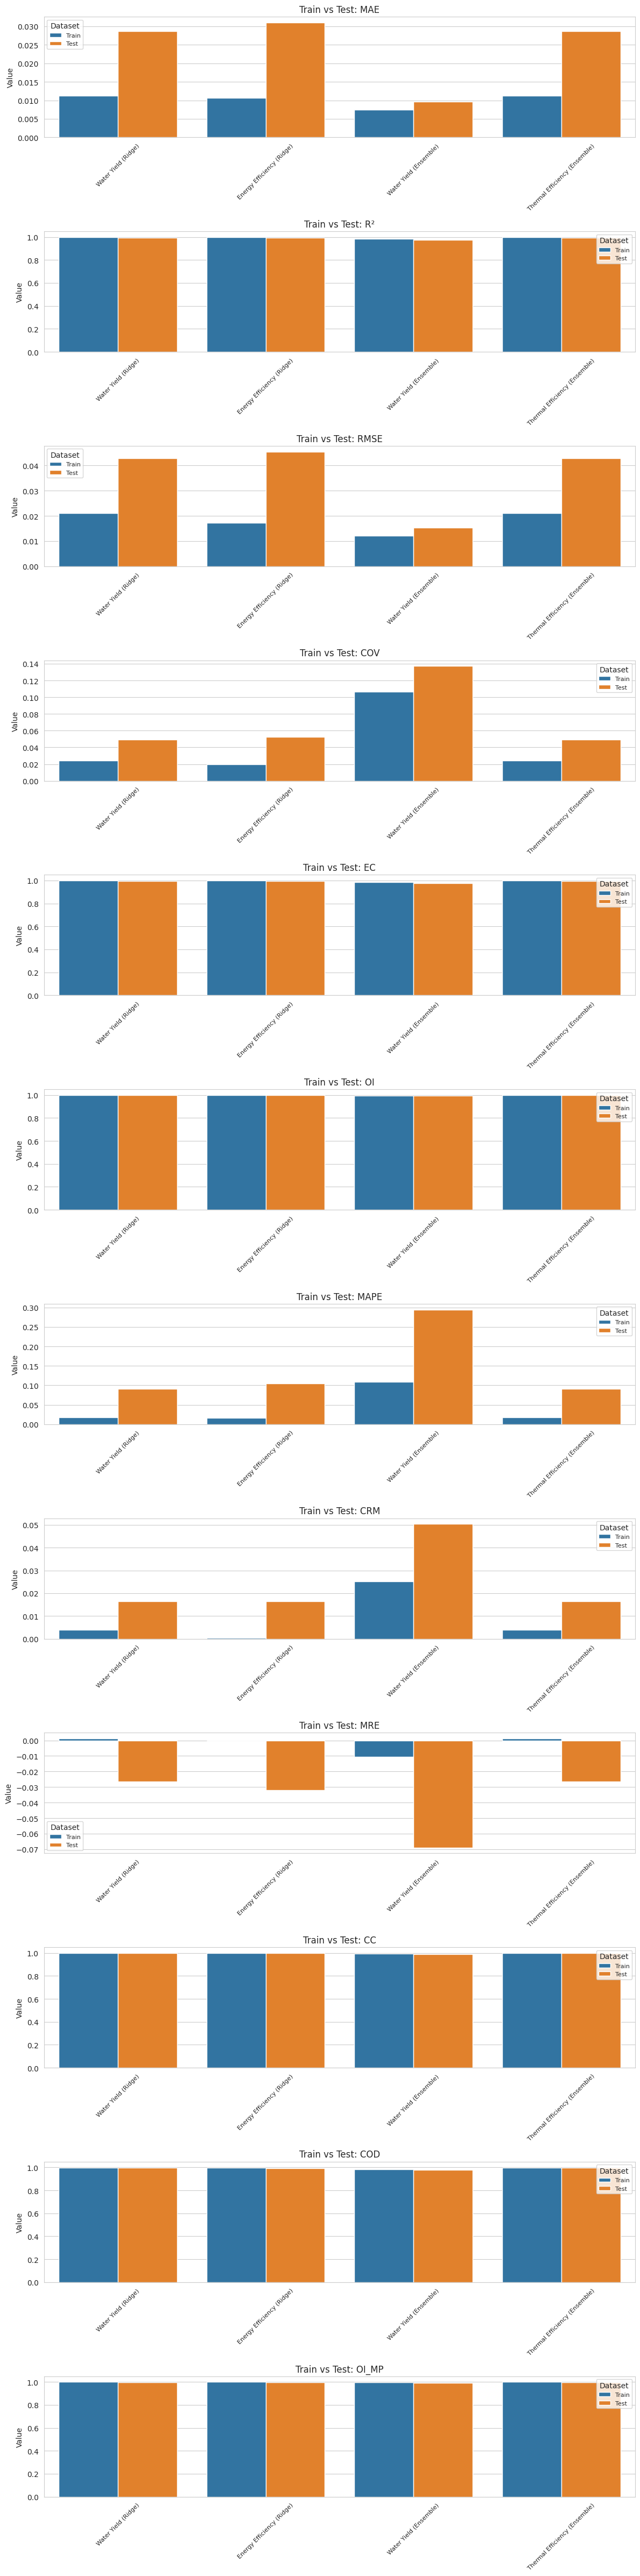

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Metrics': ['Train MAE', 'Test MAE', 'Train R²', 'Test R²', 'Train RMSE', 'Test RMSE', 
                'Train COV', 'Test COV', 'Train EC', 'Test EC', 'Train OI', 'Test OI', 
                'Train MAPE', 'Test MAPE', 'Train CRM', 'Test CRM', 'Train MRE', 'Test MRE', 
                'Train CC', 'Test CC', 'Train COD', 'Test COD', 'Train OI_MP', 'Test OI_MP', 
                'Train VC', 'Test VC'],
    'Water Yield Prediction (Hybrid Model with Ridge Regression)': [
        0.0112, 0.0287, 0.9986, 0.9942, 0.0210, 0.0428, 0.0240, 0.0494, 0.9986, 0.9942, 
        0.9996, 0.9985, 0.0176, 0.0904, 0.0039, 0.0164, 0.0014, -0.0264, 0.9993, 0.9974, 
        0.9986, 0.9949, 0.9996, 0.9985, None, None],
    'Energy Efficiency Prediction (Hybrid Model with Ridge Regression)': [
        0.0106, 0.0310, 0.9990, 0.9935, 0.0172, 0.0455, 0.0197, 0.0525, 0.9990, 0.9935, 
        0.9998, 0.9984, 0.0164, 0.1044, 0.0004, 0.0165, -0.0003, -0.0321, 0.9995, 0.9971, 
        0.9990, 0.9941, 0.9998, 0.9984, None, None],
    'Water Yield Prediction (Ensemble Log Stacking)': [
        0.0075, 0.0096, 0.9830, 0.9749, 0.0121, 0.0154, 0.1062, 0.1372, 0.9830, 0.9749, 
        0.9956, 0.9936, 0.1086, 0.2946, 0.0251, 0.0504, -0.0105, -0.0691, 0.9921, 0.9891, 
        0.9842, 0.9783, 0.9956, 0.9936, None, None],
    'Thermal Efficiency Prediction (Ensemble Log Stacking)': [
        0.0112, 0.0287, 0.9986, 0.9942, 0.0210, 0.0428, 0.0240, 0.0494, 0.9986, 0.9942, 
        0.9996, 0.9985, 0.0176, 0.0904, 0.0039, 0.0164, 0.0014, -0.0264, 0.9993, 0.9974, 
        0.9986, 0.9949, 0.9996, 0.9985, None, None]
}

df_comparison = pd.DataFrame(data)

df_melted = df_comparison.melt(id_vars='Metrics', var_name='Model', value_name='Value')

df_melted[['Dataset', 'Metric']] = df_melted['Metrics'].str.split(' ', n=1, expand=True)
df_melted.drop('Metrics', axis=1, inplace=True)

df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')

model_names = {
    'Water Yield Prediction (Hybrid Model with Ridge Regression)': 'Water Yield (Ridge)',
    'Energy Efficiency Prediction (Hybrid Model with Ridge Regression)': 'Energy Efficiency (Ridge)',
    'Water Yield Prediction (Ensemble Log Stacking)': 'Water Yield (Ensemble)',
    'Thermal Efficiency Prediction (Ensemble Log Stacking)': 'Thermal Efficiency (Ensemble)'
}
df_melted['Model'] = df_melted['Model'].map(model_names)

valid_metrics = []
for metric in df_melted['Metric'].unique():
    if not df_melted[df_melted['Metric'] == metric]['Value'].isna().all():
        valid_metrics.append(metric)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5 * len(valid_metrics)))  
n_cols = 1  
n_rows = len(valid_metrics)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
if n_rows == 1:
    axes = [axes]  

for i, metric in enumerate(valid_metrics):
    ax = axes[i]
    subset = df_melted[df_melted['Metric'] == metric]
    sns.barplot(x='Model', y='Value', hue='Dataset', data=subset, ax=ax)
    ax.set_title(f'Train vs Test: {metric}', fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Value', fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    ax.legend(title='Dataset', fontsize=8)

plt.tight_layout()
plt.show()